In [1]:
#cosas a importar
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pylab as plt    # import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
# cargar los datos
df = pd.read_csv('../Data/attacks.csv', encoding='latin1')# encoding='latin1' para corregir un error
pd.set_option('display.max_columns', None)# Muestra todas las columnas
df                    

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Funciones de analisis preliminar de columnas:
def preliminar(df, col):
    if col == str:
        df[col] = df[col].str.lstrip()
        df[col] = df[col].str.rstrip()
    print('Type of ', col, ': ', df[col].dtype)
    col = df[col]
    
    if col.dtype == 'object':
        col = col.str.lower().str.rstrip('_').str.lstrip('_')
    
    print('Unique shape is:', col.unique().shape)
    if col.unique().shape[0] < 15:
        print('Unique values are:', col.unique())
    else:
        print('First unique values are:', col.unique()[:5])

    valores_nulos = col.isnull().sum()
    print('NaN values:', valores_nulos)

In [4]:
#guardar las dimensiones originales del dataframe
dim_original = df.shape
df.shape
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [5]:
# poner el nombre de todas las columnas en minuscula
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('.', '_').str.rstrip('_')
df.columns


Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number_1', 'case_number_2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

In [6]:
#para saber el tipo de datos que manejamos
df.info(memory_usage='deep')# vemos la cantidad de valores nulos por columna
# vemos que algunas columnas no tienen el tipo esperable:
error_type = ['case_number', 'date', 'age', 'time', 'case_number1', 'case_number2']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             8702 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex                     5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal_(y/n)             5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species                 3464 non-null 

In [7]:
#Valores nulos :
df.info(memory_usage='deep')# vemos la cantidad de valores  no nulos por columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             8702 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex                     5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal_(y/n)             5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species                 3464 non-null 

In [8]:
#Valores nulos :
valores_nulos = df.isnull().sum().sum()# valores nulos totales en columnas( primer sum()) y en filas(segundo)
valores_nulos # = 488276
nan_cols = df.isna().sum()#miro las columnas con valores nulos #df.isnull().sum()---> Es lo mismo
nan_cols[nan_cols>0] #miro las columnas donde hay valores nulos( si hay valores nulos la suma tiene que ser mayor que 0)
len(nan_cols[nan_cols>0]) # = 24, todas las columnas tienen valores nulos

24

In [9]:
nan_rows = df.isna().sum(axis=1)#miro las filas con valores nulos 
nan_rows[nan_rows > 20] #miro las filas donde hay valores nulos( si hay valores nulos la suma tiene que ser mayor que 0)
len(nan_rows[nan_rows > 20])#  = 19421 filas con valores nulos

19421

In [10]:
#Primera limpia:
df.drop(index=nan_rows[nan_rows > 20].index, inplace=True)#eliminamos todas las filas cuyos valores nulos sean superiores a 20
df.shape , dim_original # Hemos reducido considerablemente el numero de filas al quitar las nulas

((6302, 24), (25723, 24))

In [11]:
#Analizamos las columnas y encontramos relaciones entre ellas:
# las columnas date, case_number, case_number1, case_number2, hablan de fechas(cada una tiene un formato diferente). Se podrian llegar a relacionar con las col 'year' y 'time'
#Las columnas ['country', 'area', 'location'] hablan de localización.
#Las col injury y fatal relacionan el tipo de lesión y si es mortal o no.
#Las col 'href' y 'href_formula' también están relacionadas.
#Las dos ultimas col 'unnamed:_22', 'unnamed:_23' son bastante irrelevantes.

In [12]:
#DEFINICIÓN DEL OBJETIVO: Analizar si los ataques de tiburones se han vuelto más agresivos en los últimos  50 años.(1968-2018)
#Para ello redefiniremos el nivel de injury ( leve, grave, muy grave, mortal) usando las col injury y fatal:
#- Categorizar los datos de la col injury( apoyandonos en fatal)
# Utilizaremos las 4 col relacionadas con la fecha para definir nuestro rango temporal:
#-Eliminaremos aquellas filas que no se encuentren en un rango temporal optimo( por no tener suficientes datos dentro del rang)


In [13]:
#ANALISIS DE LA AGRESIVIDAD:

In [14]:
#Analisis preliminar de 'injury'
df['injury'].unique().shape # = 3738 tipos.Demasidos todavía, definir rango temporal antes
df['injury'].unique()
valores_nulos = df['injury'].isnull().sum() # 28 valores nulos
valores_nulos

28

In [15]:
#Analisis preliminar de 'fatal_(y/n)'
df['fatal_(y/n)'].unique().shape # = 9
df['fatal_(y/n)'].unique() #['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y']
valores_nulos = df['fatal_(y/n)'].isnull().sum() # 539 valores nulos
valores_nulos

539

In [16]:
#Limpiar datos de 'fatal_(y/n)':
df['fatal_(y/n)'] = df['fatal_(y/n)'].str.lower().str.rstrip('_').str.lstrip('_')
df['fatal_(y/n)'].unique() #['n', 'y', nan, 'm', 'unknown', '2017'].
fila = df.loc[df['fatal_(y/n)'] == 'm'] #suponemos un error al introducir m = n por cercania en el teclado, Comprobado que la persona no vuelve a aparecer más adelante.
df.loc[285, 'fatal_(y/n)'] = 'n'
fila = df.loc[df['fatal_(y/n)'] == '2017'] #accidente ocurrido en 2012, sin sentido = unknown.
df.loc[786, 'fatal_(y/n)'] = 'unknown'
df.loc[df['fatal_(y/n)'] == 'unknown'].shape # = 72. Volveremos a ellos tras categorizar 'injury'.
df['fatal_(y/n)'].fillna('unknown', inplace = True) # rellenamos los nan con 'unknown'.Volveremos a ellos tras categorizar 'injury'.
df.loc[df['fatal_(y/n)'] == 'unknown'].shape # = 611.
df['fatal_(y/n)'].unique() # ['n', 'y', 'unknown']
df.shape , dim_original

((6302, 24), (25723, 24))

In [17]:
#Limpiar datos de 'injury':
df['injury'] = df['injury'].str.lower().str.rstrip('_').str.lstrip('_')
df.loc[df['fatal_(y/n)'] == 'y', 'injury'] = 'fatal' # para cada valor que sea y(yes) en 'fatal' queremos que injury = 'fatal'
df['injury'].unique().shape # = 3222 tipos diferentes todavía
filt = df['injury'].str.contains('fatal', na=False) # comprobamos que valores contienen 'fatal', 
injury_fatal = df.loc[filt, 'injury']
injury_fatal # = 1447 con fatal en algún punto
filt1 = df['injury'].str.contains('fatal') & df['injury'].str.contains('questionable')
print(df['injury'][5590]) # hay un dato cuestionable -> 5590. No se sabe la especie.Eliminamos fila porque no se sabe si es o no un tiburon
df.drop(index = 5590)
df.loc[df['injury'] == 'fatal'].shape # = 1409 con sólo fatal.Vamos a rellenar todos los que tengan fatal con fatal directamente
df['injury'] = df['injury'].str.replace('.*fatal.*', 'fatal', regex = True)
df.loc[df['injury'] == 'fatal'].shape # = 1447 con 'fatal'.Limpio.
df['injury'].isnull().sum() # = 27. Uno menos que antes
df['injury'].fillna('unknown', inplace = True)
df.loc[df['injury'] == 'unknown'].shape # = 29
df['injury'].isnull().sum() # = 0 . No sabemos que tipo de lesión se produjo. Asi que vamos a eliminar las filas porque no son relevantes para nuestro objeto de estudio
df.drop(df.loc[df['injury'] == 'unknown'].index, inplace = True)
df['injury'].unique().shape # = 3189 tipos difetentes. Complicado aún, vamos a tratar de eliminar las filas que no sepamos si son ataques de tiburón y  que estén fuera de nuestro rango temporal

df.loc[df['fatal_(y/n)'] == 'unknown'].shape # = 531
df.loc[df['injury'] == 'fatal', 'fatal_(y/n)'] = 'y' #limpiamos col 'fatal' con 'injury'
df.loc[df['fatal_(y/n)'] == 'unknown'].shape # = 531 no ha aumentado
df.shape , dim_original

reported fatal, but this is a questionable incident


((6273, 24), (25723, 24))

In [18]:
#Analisis preliminar de 'species':
df['species'].unique().shape                 # = 1547 tipos
df['species'].unique()
valores_nulos = df['species'].isnull().sum() # 2821 valores nulos
valores_nulos

2821

In [19]:
#Limpiar datos de 'species':
# queremos buscar datos en los que no estemos seguros que sea un tiburon. La especie no nos importa
df['species'] = df['species'].str.lower().str.rstrip('_').str.lstrip('_')
df['species'].fillna('unknown', inplace = True)
df['species'].unique().shape # = 1532 tipos
filtro = ~df['species'].str.contains(r'shark|unknown', regex=True)
valores = df[filtro]['species']
valores.shape # = 234 valores que no tienen shark
valores.unique().shape# = 49 valores unicos que no tienen shark, vamos a limpiarlos: si es questionable, invalido, eliminamos fila si incluye los char shar lo cambiamos por shark
valores.unique()
df = df[~df['species'].str.contains('questionable|invalid', case=False, na=False, regex=True)]
df['species'].unique().shape # = 1520 tipos
valores.unique().shape # = 45 valores unicos que no tienen shark
valores.shape # = 65 valores
df['species'] = df['species'].str.replace('.*shar|wobbegong|porbeagle|bronze whaler|hammerhead|spurdog|dogfish|blue pointer|c. .*', 'shark', regex=True) # Sustituimos todos los valores de la columna que contengan *shar* en algún punto por 'shark'
df['species'] = df['species'].str.replace(r'\b\w*shark\w*\b', 'shark')# en el cambio anterior a todos los shark les hemos añadido una k demás, la quitamos
valores.unique().shape # = 19 valores unicos que no tienen shark
valores.shape # = 34 valores en total
valores
new_df = df.loc[df['species'].isin(valores)] # almacenamos los valores que nos quedan en un nuevo dt
new_df.shape# comprobamos esos 34 valores, en los cuales no queda claro si es o no un tiburon
df.drop(new_df.index, inplace = True)#al no estar seguros si se trata o no de un tiburon, eliminamos las filas
df.loc[df['species']== 'unknown'].shape # Recordar que tenemos 2822 filas que no estamos seguros de que se trate de un tiburon: dos opciones eliminamos o sustituimos por shark
df.shape , dim_original

((6059, 24), (25723, 24))

In [20]:
#Analisis de las columna 'year':
preliminar(df, 'year')


Type of  year :  float64
Unique shape is: (242,)
First unique values are: [2018. 2017.   nan 2016. 2015.]
NaN values: 2


In [21]:
#tenemos dos valores nulos vamos a buscarlos
indices_nulos = df[df['year'].isnull()].index
indices_nulos # = 187 y 6079
df.loc[187] # es 2017 lo sustituimos
df.loc[6079] # es 1836 lo sustituimos
df['year'][187] = 2017
df['year'][6079] = 1836
preliminar(df, 'year')

Type of  year :  float64
Unique shape is: (241,)
First unique values are: [2018. 2017. 2016. 2015. 2014.]
NaN values: 0


In [22]:
df['year'] = df['year'].astype(str) #convertivos la columna a string
def limpiar_año(valor):
    patron = r"\d{4}"
    coincidencias = re.findall(patron, valor)
    if coincidencias:
        return coincidencias[0]
    else:
        return valor
df['year'] = df['year'].apply(limpiar_año)
preliminar(df, 'year')
patron = ~df['year'].str.contains(r"\d{4}")
new_df = df[patron]
preliminar(new_df, 'year')# son solo cuatro valores únicos
new_df.shape             # son 123 filas cuyo año no sigue el formato. No queda claro cuando fue, eliminamos por nuestro objeto de estudio
df = df.drop(new_df.index)
preliminar(df, 'year')
df.shape , dim_original


Type of  year :  object
Unique shape is: (241,)
First unique values are: ['2018' '2017' '2016' '2015' '2014']
NaN values: 0
Type of  year :  object
Unique shape is: (4,)
Unique values are: ['500.0' '77.0' '5.0' '0.0']
NaN values: 0
Type of  year :  object
Unique shape is: (237,)
First unique values are: ['2018' '2017' '2016' '2015' '2014']
NaN values: 0


((5936, 24), (25723, 24))

In [23]:
#Nuestro objeto de estudio son los ultimos 50 años hasta 1968. Vamos a verlos
df['year'] = df['year'].astype(int)
new_df = df[df['year'] < 1969]
new_df.shape # 2548 filas antes de 1968, fuera de nuestro rango de estudio. Se van fuera
df = df.drop(new_df.index)
df.shape , dim_original

((3349, 24), (25723, 24))

In [24]:
#Analisis de las columnas relacionadas con la fecha:
df.head()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed:_22,unnamed:_23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"no injury to occupant, outrigger canoe and pad...",n,18h00,shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,minor injury to left thigh,n,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,injury to left lower leg from surfboard skeg,n,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,minor injury to lower leg,n,NaN,shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,lacerations to leg & hand shark provoked incident,n,NaN,"shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [25]:
#Analisis preliminar de 'case_number'
preliminar(df, 'case_number')

Type of  case_number :  object
Unique shape is: (3341,)
First unique values are: ['2018.06.25' '2018.06.18' '2018.06.09' '2018.06.08' '2018.06.04']
NaN values: 0


In [26]:
#Analisis preliminar de 'date'
preliminar(df, 'date')

Type of  date :  object
Unique shape is: (2855,)
First unique values are: ['25-jun-2018' '18-jun-2018' '09-jun-2018' '08-jun-2018' '04-jun-2018']
NaN values: 0


In [27]:
#Analisis preliminar de 'case_number_1'
preliminar(df, 'case_number_1')

Type of  case_number_1 :  object
Unique shape is: (3341,)
First unique values are: ['2018.06.25' '2018.06.18' '2018.06.09' '2018.06.08' '2018.06.04']
NaN values: 0


In [28]:
#Analisis preliminar de 'case_number_2'
preliminar(df, 'case_number_2')

Type of  case_number_2 :  object
Unique shape is: (3341,)
First unique values are: ['2018.06.25' '2018.06.18' '2018.06.09' '2018.06.08' '2018.06.04']
NaN values: 0


In [29]:
# Vamos a convertir todos los valores de cada columna al mismo formato: year_month_day
#case_number: tiene un valor nulo, vamos a corregirlo

"""columna = 'case_number'
indices_nulos = df[df[columna].isnull()].index.tolist()
indices_nulos # el indice erróneo es 5488
df.loc[5488] #Lo buscamos y vemos que podemos completarlo con una de las otras columnas, en este caso case_number_1
df['case_number'][5488] = df['case_number_1'][5488]""" #inecesario al limpiar las filas por el año





"columna = 'case_number'\nindices_nulos = df[df[columna].isnull()].index.tolist()\nindices_nulos # el indice erróneo es 5488\ndf.loc[5488] #Lo buscamos y vemos que podemos completarlo con una de las otras columnas, en este caso case_number_1\ndf['case_number'][5488] = df['case_number_1'][5488]"

In [30]:

def limpiar_valor(valor):
    patron = r"\d{4}\.\d{2}\.\d{2}"
    coincidencias = re.findall(patron, valor)
    if coincidencias:
        return coincidencias[0]
    else:
        return valor
#definimos una funcion que elimine las letras de los valores que sigan el patron dado
df['case_number'] = df['case_number'].apply(limpiar_valor)
cantidad_no_cumplen_patron = df[~df['case_number'].str.contains(r"\d{4}\.\d{2}\.\d{2}")]
cantidad_no_cumplen_patron # comprobamos cuantos valores no siguen el patron: 1 que tiene un guión mal colocado
df['case_number'][390] = df['case_number_1'][390]
df['case_number'][390] # perfecto
df['case_number'] = df['case_number'].str.replace(r"(\d{4})\.(\d{2})\.(\d{2})", r"\3-\2-\1")#ledamos la vuelta
df['case_number_1'] = df['case_number'] 
df['case_number_2'] = df['case_number']
df.tail(25)

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed:_22,unnamed:_23
3418,05-11-1969,05-Nov-1969,1969,Provoked,AUSTRALIA,New South Wales,"Marineland, Sydney",NaN,A. Robson,M,27,provoked incident,n,NaN,unknown,"J. Green, p.36",1969.11.05-Robson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,05-11-1969,05-11-1969,2885.0,NaN,NaN
3419,14-10-1969,14-Oct-1969,1969,Unprovoked,USA,Hawaii,Hawaii,Diving,Richard Hegeman,M,NaN,no injury,n,Morning,shark,H.D. Baldridge (1994) SAF Case #1579,1969.10.14-NV-Hegeman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,14-10-1969,14-10-1969,2884.0,NaN,NaN
3420,06-09-1969,06-Sep-1969,1969,Unprovoked,USA,California,"Bird Rock, Tomales Point, near Marin County / ...",Free diving for abalone,Donald Joslin,M,53,leg & ankle severely bitten,n,11h20,"shark, 4.3 m 4.9 m [14' to 16']","D. Miller & R. Collier; R. Collier, pp.42-44; ...",1969.09.06-DonaldJoslin_Collier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,06-09-1969,06-09-1969,2883.0,NaN,NaN
3421,29-08-1969,29-Aug-1969,1969,Unprovoked,USA,Florida,"North Beach, St. Lucie County",Floating on his back,D.C. Barnes,M,NaN,laceration to right leg,n,Afternoon,unknown,"News Tribune, 8/30/1969",1969.08.29-Barnes.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,29-08-1969,29-08-1969,2882.0,NaN,NaN
3422,22-08-1969,22-Aug-1969,1969,Provoked,USA,Massachusetts,40 miles south of Nantucket,Fishing,Robert Eleniefsky,M,28,leg bitten by netted shark provoked incident,n,NaN,unknown,"Portsmouth Herald, 8/23/1969",1969.08.22-Eleniefsky.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,22-08-1969,22-08-1969,2881.0,NaN,NaN
3423,02-08-1969,02-Aug-1969,1969,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,John. Wilson,M,15,lacerations to lower leg,n,Morning,unknown,"St. Petersburg Times, 8/3/1969; H.D. Baldridge...",1969.08.02-Wilson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,02-08-1969,02-08-1969,2880.0,NaN,NaN
3424,01-08-1969,02-Aug-1969,1969,Unprovoked,USA,Florida,"St. Petersburg, Pinnellas County",Body surfing,Robert Wamser,M,13,lacerations to right lower leg & left arm and ...,n,16h30,shark,"NYTimes, 8/3/1969",1969.08.01-Wamser.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,01-08-1969,01-08-1969,2879.0,NaN,NaN
3425,00-08-1969,Aug-1969,1969,Unprovoked,NaN,NaN,NaN,NaN,Rodney Hughes,M,25,am lacerated,n,NaN,unknown,H.D. Baldridge (1994) SAF Case #1602,1969.08.00-NV-Hughes.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,00-08-1969,00-08-1969,2878.0,NaN,NaN
3426,27-07-1969,27-Jul-1969,1969,Provoked,ENGLAND,NaN,NaN,NaN,Eric Brown,M,NaN,arm lacerated. recorded as provoked incident,n,NaN,unknown,H.D. Baldridge (1994) SAF Case #1611,1969.07.27-NV-Brown.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,27-07-1969,27-07-1969,2877.0,NaN,NaN
3427,22-07-1969,22-Jul-1969,1969,Provoked,USA,Florida,Florida Keys,NaN,Walter Griffin,M,13,scrape on head. recorded as provoked incident,n,16h00,shark,H.D. Baldridge (1994) SAF Case #1603,1969.07.22-NV-Griffin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,22-07-1969,22-07-1969,2876.0,NaN,NaN


In [31]:
#Vamos con la columna 'date':
df['date'] = df['date'].astype(str) #convertivos la columna a string
df['date'] = df['date'].str.lower().str.rstrip('_').str.lstrip('_')
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
meses = {'jan': '01', 'feb': '02', 'mar': '03', 'apr': '04', 'may': '05', 'jun': '06', 'jul': '07', 'aug': '08', 'sep': '09', 'oct': '10', 'nov': '11', 'dec': '12'}
# Recorremos cada valor de la columna 'date'
for index, value in df['date'].items():
    # Verificamos si el valor contiene alguna abreviatura de mes
    if any(month in value for month in months):
        # Sustituimos la abreviatura del mes por el número correspondiente
        for month in months:
            value = value.replace(month, meses[month])
        # Actualizamos el valor en el dataframe
        df.loc[index, 'date'] = value
condition =  ~df['date'].str.contains(r"\d{2}-\d{2}-\d{4}\b")
new_df = df[condition]
new_df.shape # = 232 filas no corresponden al formato, seleccionamos aquellas que tienen una s(ref decada)
nuevos_valores = new_df[new_df['date'].str.contains('s')]# = 13 valores contienen s, y 5 no se refieren a una decada, eliminamos las otras 8 filas por no saber claramente el año
df = df[~df['date'].str.contains(r'\d{4}s')]
df.shape , dim_original

((3341, 24), (25723, 24))

In [32]:
#Vamos con las columnas que no tienen relevancia para nuestro objeto de studio: 
# Queremos quitar valores nulos por 'unknown', poner los str en min y capitalizar todas las palabras
def clean(df, col):
    df[col] = df[col].str.strip()
    df[col] = df[col].fillna('unknown')
    df[col] = df[col].str.lower()
    return df

def capitalize(df,col):
    df[col] = df[col].apply(lambda x: x.title())
    return df



In [33]:
#Vamos con la columna 'type':
preliminar(df, 'type')# solo resulta raro dos valores: questionable boatomg


Type of  type :  object
Unique shape is: (9,)
Unique values are: ['boating' 'unprovoked' 'invalid' 'provoked' 'questionable' 'sea disaster'
 nan 'boat' 'boatomg']
NaN values: 2


In [34]:
clean(df, 'type')
df['type'] = df['type'].replace(['questionable', 'invalid'], 'unknown')
df['type'] = df['type'].replace(['boatomg','boat'], 'boating')
capitalize(df, 'type')

preliminar(df, 'type')


Type of  type :  object
Unique shape is: (5,)
Unique values are: ['boating' 'unprovoked' 'unknown' 'provoked' 'sea disaster']
NaN values: 0


In [35]:
#Vamos con la columna 'country':
preliminar(df, 'country')

Type of  country :  object
Unique shape is: (116,)
First unique values are: ['usa' 'australia' 'mexico' 'brazil' 'south africa']
NaN values: 9


In [36]:
clean(df, 'country')
capitalize(df, 'country')# Terminado


,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed:_22,unnamed:_23
0,25-06-2018,25-06-2018,2018,Boating,Usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"no injury to occupant, outrigger canoe and pad...",n,18h00,shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,25-06-2018,25-06-2018,6303.0,NaN,NaN
1,18-06-2018,18-06-2018,2018,Unprovoked,Usa,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,minor injury to left thigh,n,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,18-06-2018,18-06-2018,6302.0,NaN,NaN
2,09-06-2018,09-06-2018,2018,Unknown,Usa,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,injury to left lower leg from surfboard skeg,n,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,09-06-2018,09-06-2018,6301.0,NaN,NaN
3,08-06-2018,08-06-2018,2018,Unprovoked,Australia,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,minor injury to lower leg,n,NaN,shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,08-06-2018,08-06-2018,6300.0,NaN,NaN
4,04-06-2018,04-06-2018,2018,Provoked,Mexico,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,lacerations to leg & hand shark provoked incident,n,NaN,"shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,04-06-2018,04-06-2018,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3440,17-02-1969,reported 17-02-1969,1969,Provoked,Australia,Tasmania,Taroona,Fishing,George Pacey,M,49,lacerations to hand from hooked shark provoked...,n,Daytime,shark,"C. Black, GSAF",1969.02.17.R-Pacey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,17-02-1969,17-02-1969,2863.0,NaN,NaN
3442,27-01-1969,27-01-1969,1969,Unprovoked,Australia,New South Wales,Beecroft Head,Freediving,Kevin Deacon,M,21,abrasions and lacerations to lower right leg,n,07h30,unknown,H.D.Baldridge (1994) SAF Case #1560,1969.01.27-Deacon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,27-01-1969,27-01-1969,2861.0,NaN,NaN
3443,00-01-1969,01-1969,1969,Unprovoked,Australia,Victoria,Port MacDonnel,NaN,W.D. Simpson,M,NaN,minor injury,n,NaN,shark,"H.D.Baldridge (1994), SAF Case #1594",1969.01.00-Simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,00-01-1969,00-01-1969,2860.0,NaN,NaN
3444,00-00-1969,winter 1969,1969,Provoked,Bahamas,Eleuthera,NaN,Sight-seeing,"14' boat, occupant: Jonathan Leodorn",NaN,NaN,"no injury to occupants, shark grabbed prop, le...",n,NaN,shark,"M. Vorenberg, p.154",1969.00.00-Leodorn.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,00-00-1969,00-00-1969,2859.0,NaN,NaN


In [37]:
#Vamos con la columna 'area':
preliminar(df, 'area')


Type of  area :  object
Unique shape is: (381,)
First unique values are: ['california' 'georgia' 'hawaii' 'new south wales' 'colima']
NaN values: 143


In [38]:
clean(df, 'area')
capitalize(df, 'area')
df['area'] = df['area'].replace('Unknown', pd.NA).fillna(df['country'])



In [39]:
#Vamos con la columna 'location':
preliminar(df, 'location')

Type of  location :  object
Unique shape is: (2242,)
First unique values are: ['oceanside, san diego county' 'st. simon island, glynn county'
 'habush, oahu' 'arrawarra headland' 'la ticla']
NaN values: 177


In [40]:
clean(df, 'location')
capitalize(df, 'location')
df['location'] = df['location'].replace('Unknown', pd.NA).fillna(df['area'])
#Rellenamos los valores unknown por valores conocidos
df['area'] = df['area'].replace('Unknown', pd.NA).fillna(df['location'])
df['country'] = df['country'].replace('Unknown', pd.NA).fillna(df['location'])


In [41]:
#Vamos con la columna 'activity':
preliminar(df, 'activity')

Type of  activity :  object
Unique shape is: (557,)
First unique values are: ['paddling' 'standing' 'surfing' 'free diving' 'kite surfing']
NaN values: 204


In [42]:
clean(df, 'activity')
df

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed:_22,unnamed:_23
0,25-06-2018,25-06-2018,2018,Boating,Usa,California,"Oceanside, San Diego County",paddling,Julie Wolfe,F,57,"no injury to occupant, outrigger canoe and pad...",n,18h00,shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,25-06-2018,25-06-2018,6303.0,NaN,NaN
1,18-06-2018,18-06-2018,2018,Unprovoked,Usa,Georgia,"St. Simon Island, Glynn County",standing,Adyson McNeely,F,11,minor injury to left thigh,n,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,18-06-2018,18-06-2018,6302.0,NaN,NaN
2,09-06-2018,09-06-2018,2018,Unknown,Usa,Hawaii,"Habush, Oahu",surfing,John Denges,M,48,injury to left lower leg from surfboard skeg,n,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,09-06-2018,09-06-2018,6301.0,NaN,NaN
3,08-06-2018,08-06-2018,2018,Unprovoked,Australia,New South Wales,Arrawarra Headland,surfing,male,M,NaN,minor injury to lower leg,n,NaN,shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,08-06-2018,08-06-2018,6300.0,NaN,NaN
4,04-06-2018,04-06-2018,2018,Provoked,Mexico,Colima,La Ticla,free diving,Gustavo Ramos,M,NaN,lacerations to leg & hand shark provoked incident,n,NaN,"shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,04-06-2018,04-06-2018,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3440,17-02-1969,reported 17-02-1969,1969,Provoked,Australia,Tasmania,Taroona,fishing,George Pacey,M,49,lacerations to hand from hooked shark provoked...,n,Daytime,shark,"C. Black, GSAF",1969.02.17.R-Pacey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,17-02-1969,17-02-1969,2863.0,NaN,NaN
3442,27-01-1969,27-01-1969,1969,Unprovoked,Australia,New South Wales,Beecroft Head,freediving,Kevin Deacon,M,21,abrasions and lacerations to lower right leg,n,07h30,unknown,H.D.Baldridge (1994) SAF Case #1560,1969.01.27-Deacon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,27-01-1969,27-01-1969,2861.0,NaN,NaN
3443,00-01-1969,01-1969,1969,Unprovoked,Australia,Victoria,Port Macdonnel,unknown,W.D. Simpson,M,NaN,minor injury,n,NaN,shark,"H.D.Baldridge (1994), SAF Case #1594",1969.01.00-Simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,00-01-1969,00-01-1969,2860.0,NaN,NaN
3444,00-00-1969,winter 1969,1969,Provoked,Bahamas,Eleuthera,Eleuthera,sight-seeing,"14' boat, occupant: Jonathan Leodorn",NaN,NaN,"no injury to occupants, shark grabbed prop, le...",n,NaN,shark,"M. Vorenberg, p.154",1969.00.00-Leodorn.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,00-00-1969,00-00-1969,2859.0,NaN,NaN


In [43]:
sust = ['paddling', 'standing', 'surfing', 'diving', 'fishing', 'swimming']
for v in sust:
    df.loc[df['activity'].str.contains(v, case=False, na=False), 'activity'] = v  # por cada valor en la lista si loc. en la col del df si el valor contiene una palabra de la lista la sustituye por la palabra 
preliminar(df, 'activity')


Type of  activity :  object
Unique shape is: (255,)
First unique values are: ['paddling' 'standing' 'surfing' 'diving' 'swimming']
NaN values: 0


In [44]:
df

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed:_22,unnamed:_23
0,25-06-2018,25-06-2018,2018,Boating,Usa,California,"Oceanside, San Diego County",paddling,Julie Wolfe,F,57,"no injury to occupant, outrigger canoe and pad...",n,18h00,shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,25-06-2018,25-06-2018,6303.0,NaN,NaN
1,18-06-2018,18-06-2018,2018,Unprovoked,Usa,Georgia,"St. Simon Island, Glynn County",standing,Adyson McNeely,F,11,minor injury to left thigh,n,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,18-06-2018,18-06-2018,6302.0,NaN,NaN
2,09-06-2018,09-06-2018,2018,Unknown,Usa,Hawaii,"Habush, Oahu",surfing,John Denges,M,48,injury to left lower leg from surfboard skeg,n,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,09-06-2018,09-06-2018,6301.0,NaN,NaN
3,08-06-2018,08-06-2018,2018,Unprovoked,Australia,New South Wales,Arrawarra Headland,surfing,male,M,NaN,minor injury to lower leg,n,NaN,shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,08-06-2018,08-06-2018,6300.0,NaN,NaN
4,04-06-2018,04-06-2018,2018,Provoked,Mexico,Colima,La Ticla,diving,Gustavo Ramos,M,NaN,lacerations to leg & hand shark provoked incident,n,NaN,"shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,04-06-2018,04-06-2018,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3440,17-02-1969,reported 17-02-1969,1969,Provoked,Australia,Tasmania,Taroona,fishing,George Pacey,M,49,lacerations to hand from hooked shark provoked...,n,Daytime,shark,"C. Black, GSAF",1969.02.17.R-Pacey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,17-02-1969,17-02-1969,2863.0,NaN,NaN
3442,27-01-1969,27-01-1969,1969,Unprovoked,Australia,New South Wales,Beecroft Head,diving,Kevin Deacon,M,21,abrasions and lacerations to lower right leg,n,07h30,unknown,H.D.Baldridge (1994) SAF Case #1560,1969.01.27-Deacon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,27-01-1969,27-01-1969,2861.0,NaN,NaN
3443,00-01-1969,01-1969,1969,Unprovoked,Australia,Victoria,Port Macdonnel,unknown,W.D. Simpson,M,NaN,minor injury,n,NaN,shark,"H.D.Baldridge (1994), SAF Case #1594",1969.01.00-Simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,00-01-1969,00-01-1969,2860.0,NaN,NaN
3444,00-00-1969,winter 1969,1969,Provoked,Bahamas,Eleuthera,Eleuthera,sight-seeing,"14' boat, occupant: Jonathan Leodorn",NaN,NaN,"no injury to occupants, shark grabbed prop, le...",n,NaN,shark,"M. Vorenberg, p.154",1969.00.00-Leodorn.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,00-00-1969,00-00-1969,2859.0,NaN,NaN


In [45]:
#Volvemos con la columna 'injury':

In [46]:
preliminar(df, 'injury')

Type of  injury :  object
Unique shape is: (1908,)
First unique values are: ['no injury to occupant, outrigger canoe and paddle damaged'
 'minor injury to left thigh'
 'injury to left lower leg from surfboard skeg'
 'minor injury to lower leg'
 'lacerations to leg & hand shark provoked incident']
NaN values: 0


In [47]:
"""for i, v in enumerate(df['injury']):
    if 'no injury' in v:
        df.loc[i, 'injury'] = 'no injury'
    elif 'minor' in v:
        df.loc[i, 'injury'] = 'minor injury'
    elif 'severe' in v:
        df.loc[i, 'injury'] = 'severe injury'
    elif 'cut' in v:
        df.loc[i, 'injury'] = 'severe injury'"""



df.shape

(3341, 24)

In [48]:
df['injury'] = df['injury'].str.replace(' ', '_')
df = df[~df['injury'].str.contains('presumed|scaveng|hoax|not_confirmed|doubt|no_detail|drown|never|unconfirmed|disappear|swordfish|not_recovered|crocodile|unidentified')]
df.loc[df['injury'].str.contains('recove|missing|kill', na=False), 'injury'] = 'fatal'
df.shape


(3253, 24)

In [49]:
df['injury'] = np.where(df['injury'].str.contains('grab|board|boat|no_injur|unhurt|uninjured|no_attack|not_injure|no_inur|neither_were_injured|no_ijnury'), 'no injury',
                               np.where(df['injury'].str.contains('rammed|torn|scrape|rib|abrade|nip|bruise|grazed|minor|shallow|contusion|scratch|superficial|toe|finger'), 'minor injury',
                                        np.where(df['injury'].str.contains('neck|fractur|removed|gash|amputat|avuls|sever|cut|major|bit|nipped|mouthed|massive|lost|extensive|serious'), 'severe injury',
                                                 np.where(df['injury'].str.contains('elbow|thigh|ankle|leg|hand|feet|foot|lacera|significant|lacerated|puncture|abrasion|inju'), 'injury' , df['injury'])
                                                )
                                       )
                              )
df['injury'].unique().shape

(18,)

In [50]:
df['injury'].unique()


array(['no injury', 'minor injury', 'injury', 'fatal', 'severe injury',
       'possibly_a_provoked_incident', 'unknown,_but_survived',
       'provoked_incident?__', 'stepped_on_shark_provoked_incident',
       'reports_said_a_shark_attacked_the_dinghy,_but_vickery_said_it_did_not',
       'stingray_envenomation,_not_a_shark', 'survived',
       'non-swimmer_pulled_off_pier&_into_the_water_by_a_hooked_shark_provoked_incident',
       'shark_involvement_probably_post-mortem',
       '5_m_white_shark_obsrved_feeding_on_remains_6_days_later',
       'note:_see_1992.06.28', 'swept_out_to_sea,_feared_taken_by_shark',
       'provoked_incident'], dtype=object)

In [51]:
#Después de esto quedan pocas injuries sin catalogar, vamos a quitar aquellas filas que no sean ataques de tiburon o que no sepamos el alcance de las lesiones
valores_a_eliminar = ['reports_said_a_shark_attacked_the_dinghy,_but_vickery_said_it_did_not', 
                      'killed_by_a_stingray,_not_a_shark_-_a_tragedy_for_his_family_and_marine_wildlife',
                      'shark_involvement_probably_post-mortem',
                      'scrape_to_right_forearm._frennet_says_inflicted_by_a_blue_shark,_but_authorities_question_shark_involvement',
                      'stingray_envenomation,_not_a_shark',
                      'provoked_incident',
                      'provoked_incident?__',
                      'unknown,_but_survived',
                      'possibly_a_provoked_incident',
                      '5_m_white_shark_obsrved_feeding_on_remains_6_days_later',
                      'survived',
                      'swept_out_to_sea,_feared_taken_by_shark',
                      'note:_see_1992.06.28',
                      'stepped_on_shark_provoked_incident',
                      'non-swimmer_pulled_off_pier&_into_the_water_by_a_hooked_shark_provoked_incident'
                      
            
                     ]
filas_a_eliminar = df.loc[df['injury'].isin(valores_a_eliminar)]
filas_a_eliminar.head(6)
df = df.drop(filas_a_eliminar.index)
df['injury'].unique()#terminado



array(['no injury', 'minor injury', 'injury', 'fatal', 'severe injury'],
      dtype=object)

In [52]:
df.shape , dim_original

((3185, 24), (25723, 24))

In [53]:
#Vamos a crear una nueva columna que asocie los resultados de 'injury' con ciertos valores:
injuries = ['no injury', 'minor injury', 'injury', 'severe injury', 'fatal']
values = [0, 1, 2, 3, 4]
injury_value = dict(zip(injuries, values ))
df['injury_values'] = df['injury'].map(injury_value)
df.shape , dim_original

((3185, 25), (25723, 24))

In [54]:
#Vamos con la columna 'sex':
preliminar(df, 'sex')
df.loc[df['sex'] == 'lli']# Nombre Brian, reasignamos con m
df.loc[df['sex'] == 'lli', 'sex'] = 'm'


Type of  sex :  object
Unique shape is: (5,)
Unique values are: ['f' 'm' nan 'm ' 'lli']
NaN values: 191


In [55]:
#Vamos con la columna 'name':
preliminar(df, 'name')
df

Type of  name :  object
Unique shape is: (2768,)
First unique values are: ['julie wolfe' 'adyson\xa0mcneely ' 'john denges' 'male' 'gustavo ramos ']
NaN values: 53


,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed:_22,unnamed:_23,injury_values
0,25-06-2018,25-06-2018,2018,Boating,Usa,California,"Oceanside, San Diego County",paddling,Julie Wolfe,F,57,no injury,n,18h00,shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,25-06-2018,25-06-2018,6303.0,NaN,NaN,0
1,18-06-2018,18-06-2018,2018,Unprovoked,Usa,Georgia,"St. Simon Island, Glynn County",standing,Adyson McNeely,F,11,minor injury,n,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,18-06-2018,18-06-2018,6302.0,NaN,NaN,1
2,09-06-2018,09-06-2018,2018,Unknown,Usa,Hawaii,"Habush, Oahu",surfing,John Denges,M,48,no injury,n,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,09-06-2018,09-06-2018,6301.0,NaN,NaN,0
3,08-06-2018,08-06-2018,2018,Unprovoked,Australia,New South Wales,Arrawarra Headland,surfing,male,M,NaN,minor injury,n,NaN,shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,08-06-2018,08-06-2018,6300.0,NaN,NaN,1
4,04-06-2018,04-06-2018,2018,Provoked,Mexico,Colima,La Ticla,diving,Gustavo Ramos,M,NaN,injury,n,NaN,"shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,04-06-2018,04-06-2018,6299.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3440,17-02-1969,reported 17-02-1969,1969,Provoked,Australia,Tasmania,Taroona,fishing,George Pacey,M,49,injury,n,Daytime,shark,"C. Black, GSAF",1969.02.17.R-Pacey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,17-02-1969,17-02-1969,2863.0,NaN,NaN,2
3442,27-01-1969,27-01-1969,1969,Unprovoked,Australia,New South Wales,Beecroft Head,diving,Kevin Deacon,M,21,injury,n,07h30,unknown,H.D.Baldridge (1994) SAF Case #1560,1969.01.27-Deacon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,27-01-1969,27-01-1969,2861.0,NaN,NaN,2
3443,00-01-1969,01-1969,1969,Unprovoked,Australia,Victoria,Port Macdonnel,unknown,W.D. Simpson,M,NaN,minor injury,n,NaN,shark,"H.D.Baldridge (1994), SAF Case #1594",1969.01.00-Simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,00-01-1969,00-01-1969,2860.0,NaN,NaN,1
3444,00-00-1969,winter 1969,1969,Provoked,Bahamas,Eleuthera,Eleuthera,sight-seeing,"14' boat, occupant: Jonathan Leodorn",NaN,NaN,no injury,n,NaN,shark,"M. Vorenberg, p.154",1969.00.00-Leodorn.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,00-00-1969,00-00-1969,2859.0,NaN,NaN,0


In [56]:
df['name'] = df['name'].fillna('unknown')# rellenamos los nulos
new_df = df[~df['name'].str.match('^[A-Z]')]# creamos un new df con los valores que no empiecen por mayus
new_df['name'] = new_df['name'].str.replace('.*([A-Z].*)', r'\1') #Vamos a filtrar el new_df para los valores que tengan mayus
preliminar(new_df, 'name')
new_df

Type of  name :  object
Unique shape is: (148,)
First unique values are: ['male' 'female' 'unknown' 'jimenez' '31 migrants']
NaN values: 0


,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed:_22,unnamed:_23,injury_values
3,08-06-2018,08-06-2018,2018,Unprovoked,Australia,New South Wales,Arrawarra Headland,surfing,male,M,NaN,minor injury,n,NaN,shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,08-06-2018,08-06-2018,6300.0,NaN,NaN,1
7,27-05-2018,27-05-2018,2018,Unprovoked,Usa,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",fishing,male,M,52,minor injury,n,NaN,"shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,27-05-2018,27-05-2018,6296.0,NaN,NaN,1
9,26-05-2018,26-05-2018,2018,Unprovoked,Usa,Florida,"Daytona Beach, Volusia County",standing,male,M,12,minor injury,n,14h00,unknown,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,26-05-2018,26-05-2018,6294.0,NaN,NaN,1
10,24-05-2018,24-05-2018,2018,Provoked,Australia,Queensland,Cairns Aquarium,feeding sharks,male,M,32,minor injury,n,Morning,shark,"ABC.net.au ,05/24/2018",2018.05.24-CairnsAquarium.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,24-05-2018,24-05-2018,6293.0,NaN,NaN,1
15,12-05-2018,12-05-2018,2018,Unprovoked,South Africa,Eastern Cape Province,"Nahoon Beach, East London",surfing,male,M,NaN,no injury,n,11h00,unknown,"B.Jacob, Dispatch Live, 5/12/2018",2018.05.12-EastLondon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,12-05-2018,12-05-2018,6288.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3404,16-01-1970,16-01-1970,1970,Sea Disaster,Egypt,Red Sea,A Few Miles South Of Port Suez,air disaster,Israeli skyhawk,M,NaN,fatal,y,NaN,unknown,"The Progress, 1/17/1970",1970.01.16-IsraeliPilot.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,16-01-1970,16-01-1970,2899.0,NaN,NaN,4
3406,09-01-1970,reported 09-01-1970,1970,Unprovoked,England,Devon,Teignmouth,attempted to return injured shark to the sea,a fisherman,M,NaN,severe injury,n,NaN,shark,"Reading Eagle, 1/9/1970",1970.01.09.R-England.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,09-01-1970,09-01-1970,2897.0,NaN,NaN,3
3410,00-00-1970,ca. 1970,1970,Boating,Italy,Sardinia,Golfo Di Oristano,fishing,male,M,NaN,no injury,n,NaN,shark,A. De Maddalena; M. Cottiglia (pers. Comm.),1970.00.00.f-Sardinia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,00-00-1970,00-00-1970,2893.0,NaN,NaN,0
3444,00-00-1969,winter 1969,1969,Provoked,Bahamas,Eleuthera,Eleuthera,sight-seeing,Leodorn,NaN,NaN,no injury,n,NaN,shark,"M. Vorenberg, p.154",1969.00.00-Leodorn.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,00-00-1969,00-00-1969,2859.0,NaN,NaN,0


In [57]:
new_df_2 = new_df[new_df['name'].str.contains('.*male.*|.*female.*|.*boy.*|.*girl.*|.*men.*|.*man.*|.*woman.*|.*women.*')]# creamos otro df solo con los valores del nuevo df que contengan male o female
new_df_2


,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed:_22,unnamed:_23,injury_values
3,08-06-2018,08-06-2018,2018,Unprovoked,Australia,New South Wales,Arrawarra Headland,surfing,male,M,NaN,minor injury,n,NaN,shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,08-06-2018,08-06-2018,6300.0,NaN,NaN,1
7,27-05-2018,27-05-2018,2018,Unprovoked,Usa,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",fishing,male,M,52,minor injury,n,NaN,"shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,27-05-2018,27-05-2018,6296.0,NaN,NaN,1
9,26-05-2018,26-05-2018,2018,Unprovoked,Usa,Florida,"Daytona Beach, Volusia County",standing,male,M,12,minor injury,n,14h00,unknown,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,26-05-2018,26-05-2018,6294.0,NaN,NaN,1
10,24-05-2018,24-05-2018,2018,Provoked,Australia,Queensland,Cairns Aquarium,feeding sharks,male,M,32,minor injury,n,Morning,shark,"ABC.net.au ,05/24/2018",2018.05.24-CairnsAquarium.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,24-05-2018,24-05-2018,6293.0,NaN,NaN,1
15,12-05-2018,12-05-2018,2018,Unprovoked,South Africa,Eastern Cape Province,"Nahoon Beach, East London",surfing,male,M,NaN,no injury,n,11h00,unknown,"B.Jacob, Dispatch Live, 5/12/2018",2018.05.12-EastLondon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,12-05-2018,12-05-2018,6288.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375,13-12-1970,13-12-1970,1970,Unprovoked,Mozambique,Inhambe Province,"Inhambe Bay Estuary, 10 To 12 Miles Inland Fro...",fishing,black male,M,18 to 22,fatal,y,NaN,unknown,"GSAF; H.D. Baldridge, p.22",1970.12.13-BlackMale-Mozambique.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,13-12-1970,13-12-1970,2928.0,NaN,NaN,4
3386,00-09-1970,09-1970,1970,Unprovoked,Usa,Florida,Pinellas County,diving,male,M,NaN,injury,n,NaN,unknown,SAF Case #1485,1970.09.00.a-NV-male.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,00-09-1970,00-09-1970,2917.0,NaN,NaN,2
3388,05-07-1970,5-07-1970,1970,Unprovoked,Unknown,Unknown,Unknown,unknown,male,M,NaN,minor injury,n,Night,shark,"H.D. Baldridge (1994), SAF Case #1628",1970.07.05-NV-male.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,05-07-1970,05-07-1970,2915.0,NaN,NaN,1
3406,09-01-1970,reported 09-01-1970,1970,Unprovoked,England,Devon,Teignmouth,attempted to return injured shark to the sea,a fisherman,M,NaN,severe injury,n,NaN,shark,"Reading Eagle, 1/9/1970",1970.01.09.R-England.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,09-01-1970,09-01-1970,2897.0,NaN,NaN,3


In [58]:
new_df_2['name'] = new_df_2['name'].str.replace('.*female.*|.*girl.*|.*woman.*|.*women.*', 'mujer')
new_df_2['name'] = new_df_2['name'].str.replace('.*male.*|.*boy.*|.*men.*|.*man.*', 'male')
#female esta dentro de la cadena .*male.*

new_df_2.loc[new_df_2.name == 'mujer']
new_df_2['name'] = new_df_2['name'].str.replace('mujer', 'female')
new_df_2.name.unique()#listo

array(['male', 'female'], dtype=object)

In [59]:
new_df.update(new_df_2['name'])
preliminar(new_df, 'name')
df.update(new_df['name'])
new_df = df[~df['name'].str.match('^[A-Z]')]# volvemos a quedarnos solo con los valores en minuscula
preliminar(new_df, 'name')
#vamos a filtrar la columna 'sex' de df con la columna 'name' de new_df:
filtro = {'male': 'm', 'female': 'f'}
df['sex'] = new_df['name'].map(filtro)

Type of  name :  object
Unique shape is: (116,)
First unique values are: ['male' 'female' 'unknown' '31 migrants' 'a lifeguard']
NaN values: 0
Type of  name :  object
Unique shape is: (33,)
First unique values are: ['male' 'female' 'unknown' '31 migrants' 'a lifeguard']
NaN values: 0


In [60]:
#actualizamos todos los valores de new_df(todos los que estaban en minuscula) por unknown
new_df['name'] = 'unknown'
df.update(new_df['name'])
df['name'] = df['name'].str.strip()
preliminar(df, 'name')
#Columna name listo
df.shape , dim_original

Type of  name :  object
Unique shape is: (2700,)
First unique values are: ['julie wolfe' 'adyson\xa0mcneely' 'john denges' 'unknown' 'gustavo ramos']
NaN values: 0


((3185, 25), (25723, 24))

In [61]:
#Vamos con la columna 'sex':
preliminar(df, 'sex')


Type of  sex :  object
Unique shape is: (3,)
Unique values are: [nan 'm' 'f']
NaN values: 2812


In [62]:
clean(df, 'sex')
capitalize(df, 'sex')
#Columna name sex terminada
df.shape , dim_original

((3185, 25), (25723, 24))

In [63]:
#Vamos con la columna 'age':
preliminar(df, 'age')
df.age.unique()


Type of  age :  object
Unique shape is: (116,)
First unique values are: ['57' '11' '48' nan '18']
NaN values: 854


array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '34',
       '30', '60', '33', '29', '54', '41', '37', '56', '19', '25', '69',
       '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24', '26',
       '49', '22', '7', '31', '17', '40', '13', '42', '3', '8', '50',
       '16', '82', '73', '20s', '68', '21', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', ' 30', '7      &    31', ' 28', '20?',
       "60's", '32 & 30', '16 to 18', '87', 'Elderly', 'mid-20s',
       'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50', '18 to 22',
       'adult'], dtype=object)

In [64]:
clean(df, 'age')
capitalize(df, 'age')
df.age.unique()
df['age'] = df['age'].str.replace('\s(?!O)', '', regex=True)
value = df['age'] == 'Ca.33'
df.loc[value, 'age'] = '33'
df.age.unique()


array(['57', '11', '48', 'Unknown', '18', '52', '15', '12', '32', '10',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40S', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20S', '68', '21', '51', '39', '58',
       'Teen', '47', '61', '65', '36', '66', '43', '60S', '9', '72', '59',
       '6', '27', '64', '23', '71', '44', '62', '63', '70', '18Months',
       '53', '30S', '50S', '77', '74', '28&26', '5', '86', '18 Or20',
       '12 Or13', '46&34', '28,23&30', 'Teens', '36&26', '8 Or10', '84',
       '', '30 Or36', '6½', '21&?', '75', '33 Or37', 'Mid-30S', '7&31',
       '20?', "60'S", '32&30', '16To18', '87', 'Elderly', 'Mid-20S',
       '21 Or26', '>50', '18To22', 'Adult'], dtype=object)

In [65]:
#Columna name age terminada
df.shape , dim_original

((3185, 25), (25723, 24))

In [66]:
#Vamos con la columna 'time':
preliminar(df, 'time')
clean(df, 'time')
df.time.unique()
# valores importantes: 'possibly same incident as 2000.08.21'
df.loc[df.time == 'possibly same incident as 2000.08.21'] 
df.loc[df.case_number == '11-08-2000']#solo hay un caso sust por 'unknown'
df.loc[df.time == 'possibly same incident as 2000.08.21', 'time'] = 'unknown'
df.loc[df.case_number == '11-08-2000']#comprobamos

Type of  time :  object
Unique shape is: (305,)
First unique values are: ['18h00' '14h00  -15h00' '07h45' nan 'late afternoon']
NaN values: 1107


,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed:_22,unnamed:_23,injury_values
2025,11-08-2000,11-08-2000,2000,Unknown,Usa,North Carolina,"Emerald Isle, Carteret County",swimming,Daniel Macatee,Unknown,Unknown,fatal,y,unknown,shark involvement not confirmed,F. Schwartz,2000.08.11-Macatee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,11-08-2000,11-08-2000,4278.0,NaN,NaN,4


In [67]:
def modify_time(v):
    v = re.sub(r'\d{2}[a-zA-Z]\d{2}([\d\w]+)', r'\1', v)
    v = v.replace(':', 'h')
    v = v.replace('/', '-').replace('&', '-')
    v = re.sub(r'am|a\.m', 'morning', v)
    return v
df.time = df.time.apply(modify_time)
df.loc[df.time == '06j00', 'time'] = '06h00'
df.time.unique()

array(['18h00', '14h00  -15h00', '07h45', 'unknown', 'late afternoon',
       '17h00', '14h00', 'morning', '15h00', '11h00', '10h30', '10h40',
       '16h50', '09h30', 'afternoon', '21h50', '09h40', '08h00', '17h35',
       '15h30', '07h30', '19h00, dusk', 'night', '16h00', '15h01',
       '12h00', '13h45', '23h30', '09h00', '14h30', '18h30', '12h30',
       '16h30', '18h45', '06h00', '10h00', '10h44', '13h19', '13h30',
       '10h45', '11h20', '11h45', '19h30', '08h30', '15h45',
       'shortly before 12h00', '17h34', '17h10', '11h15', '08h50',
       '17h45', '13h00', '10h20', '13h20', '07h00', '02h00', '09h50',
       '11h30', '17h30', '9h00', '10h43', 'after noon', '15h15', '15h40',
       '19h05', '1300', '14h30 - 15h30', '22h00', '16h20', '14h34',
       '15h25', '14h55', '17h46', '15h49', '19h00', 'midnight',
       '09h30 - 10h00', '10h15', '18h15', '04h00', '14h50', '13h50',
       '19h20', '10h25', '10h45-11h15', '16h45', '15h52', '06h15',
       '14h40', '19h45', '10h10', '0

In [68]:
#Columna name time terminada
df.shape , dim_original

((3185, 25), (25723, 24))

In [69]:
df

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed:_22,unnamed:_23,injury_values
0,25-06-2018,25-06-2018,2018,Boating,Usa,California,"Oceanside, San Diego County",paddling,Julie Wolfe,Unknown,57,no injury,n,18h00,shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,25-06-2018,25-06-2018,6303.0,NaN,NaN,0
1,18-06-2018,18-06-2018,2018,Unprovoked,Usa,Georgia,"St. Simon Island, Glynn County",standing,Adyson McNeely,Unknown,11,minor injury,n,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,18-06-2018,18-06-2018,6302.0,NaN,NaN,1
2,09-06-2018,09-06-2018,2018,Unknown,Usa,Hawaii,"Habush, Oahu",surfing,John Denges,Unknown,48,no injury,n,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,09-06-2018,09-06-2018,6301.0,NaN,NaN,0
3,08-06-2018,08-06-2018,2018,Unprovoked,Australia,New South Wales,Arrawarra Headland,surfing,unknown,M,Unknown,minor injury,n,unknown,shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,08-06-2018,08-06-2018,6300.0,NaN,NaN,1
4,04-06-2018,04-06-2018,2018,Provoked,Mexico,Colima,La Ticla,diving,Gustavo Ramos,Unknown,Unknown,injury,n,unknown,"shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,04-06-2018,04-06-2018,6299.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3440,17-02-1969,reported 17-02-1969,1969,Provoked,Australia,Tasmania,Taroona,fishing,George Pacey,Unknown,49,injury,n,daytime,shark,"C. Black, GSAF",1969.02.17.R-Pacey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,17-02-1969,17-02-1969,2863.0,NaN,NaN,2
3442,27-01-1969,27-01-1969,1969,Unprovoked,Australia,New South Wales,Beecroft Head,diving,Kevin Deacon,Unknown,21,injury,n,07h30,unknown,H.D.Baldridge (1994) SAF Case #1560,1969.01.27-Deacon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,27-01-1969,27-01-1969,2861.0,NaN,NaN,2
3443,00-01-1969,01-1969,1969,Unprovoked,Australia,Victoria,Port Macdonnel,unknown,W.D. Simpson,Unknown,Unknown,minor injury,n,unknown,shark,"H.D.Baldridge (1994), SAF Case #1594",1969.01.00-Simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,00-01-1969,00-01-1969,2860.0,NaN,NaN,1
3444,00-00-1969,winter 1969,1969,Provoked,Bahamas,Eleuthera,Eleuthera,sight-seeing,Leodorn,Unknown,Unknown,no injury,n,unknown,shark,"M. Vorenberg, p.154",1969.00.00-Leodorn.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,00-00-1969,00-00-1969,2859.0,NaN,NaN,0


In [70]:
#Volvemos a columna species:
preliminar(df, 'species')


Type of  species :  object
Unique shape is: (371,)
First unique values are: ['shark' 'unknown' 'shark, 3m' "shark, 3'" "shark, 6'"]
NaN values: 0


In [71]:
new_df = df[df['species'].str.contains('involvement', na=False)]
preliminar(new_df, 'species')
new_df.species.unique()# ninguno tiene confirmado que fuera un tiburon, eliminamos las filas
merged_df = df.merge(new_df, how='left', indicator=True)
df = merged_df[merged_df['_merge'] != 'both'].drop('_merge', axis=1)

Type of  species :  object
Unique shape is: (20,)
First unique values are: ['shark involvement not confirmed' 'shark involvement highly doubtful'
 'shark involvement prior to death not confirmed' 'shark involvement'
 'shark involvement not cofirmed']
NaN values: 0


In [72]:
df.species.unique().shape # = 353, confirmados que son tiburones no así la especie, se podria separar y sacar una columna que fuera shape

(351,)

In [73]:
df.shape , dim_original

((3066, 25), (25723, 24))

In [74]:
#Vamos con la columna 'investigator_or_source':
preliminar(df, 'investigator_or_source')
clean(df, 'investigator_or_source')
preliminar(df, 'investigator_or_source')

Type of  investigator_or_source :  object
Unique shape is: (2338,)
First unique values are: ['r. collier, gsaf' 'k.mcmurray, trackingsharks.com' 'b. myatt, gsaf'
 'a .kipper' 'daily telegraph, 6/4/2018']
NaN values: 8
Type of  investigator_or_source :  object
Unique shape is: (2325,)
First unique values are: ['r. collier, gsaf' 'k.mcmurray, trackingsharks.com' 'b. myatt, gsaf'
 'a .kipper' 'daily telegraph, 6/4/2018']
NaN values: 0


In [75]:
#Vamos con la columna 'pdf':
preliminar(df, 'pdf')
clean(df, 'pdf')
preliminar(df, 'pdf')

Type of  pdf :  object
Unique shape is: (3066,)
First unique values are: ['2018.06.25-wolfe.pdf' '2018.06.18-mcneely.pdf' '2018.06.09-denges.pdf'
 '2018.06.08-arrawarra.pdf' '2018.06.04-ramos.pdf']
NaN values: 0
Type of  pdf :  object
Unique shape is: (3066,)
First unique values are: ['2018.06.25-wolfe.pdf' '2018.06.18-mcneely.pdf' '2018.06.09-denges.pdf'
 '2018.06.08-arrawarra.pdf' '2018.06.04-ramos.pdf']
NaN values: 0


In [76]:
#Vamos con la columna 'href_formula' y 'href':
preliminar(df, 'href_formula')
preliminar(df, 'href')
#deberian ser iguales primero rellenamos el valor nulo y luego igualamos al que tenga más valores unicos
df.href_formula = df.href_formula.fillna(df['href'])
preliminar(df, 'href_formula')

Type of  href_formula :  object
Unique shape is: (3066,)
First unique values are: ['http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-wolfe.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-mcneely.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.09-denges.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.08-arrawarra.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.04-ramos.pdf']
NaN values: 1
Type of  href :  object
Unique shape is: (3061,)
First unique values are: ['http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-wolfe.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-mcneely.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.09-denges.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.08-arrawarra.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.04-ramos.pdf']
NaN values: 0
Type of  href_formul

In [77]:
df['href'] = df['href_formula']
preliminar(df, 'href_formula')
preliminar(df, 'href')

Type of  href_formula :  object
Unique shape is: (3066,)
First unique values are: ['http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-wolfe.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-mcneely.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.09-denges.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.08-arrawarra.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.04-ramos.pdf']
NaN values: 0
Type of  href :  object
Unique shape is: (3066,)
First unique values are: ['http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-wolfe.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-mcneely.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.09-denges.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.08-arrawarra.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.04-ramos.pdf']
NaN values: 0


In [78]:
#Vamos con la columna 'unnamed:_22' y 'unnamed:_23':
preliminar(df, 'unnamed:_22')
preliminar(df, 'unnamed:_23')

Type of  unnamed:_22 :  object
Unique shape is: (2,)
Unique values are: [nan 'stopped here']
NaN values: 3065
Type of  unnamed:_23 :  object
Unique shape is: (1,)
Unique values are: [nan]
NaN values: 3066


In [79]:
df['unnamed:_22'].unique()

array([nan, 'stopped here'], dtype=object)

In [80]:
#rellenamos todo con 'innecesary':
df['unnamed:_22'].fillna('innecesary')
df['unnamed:_23'].fillna('innecesary')

0       innecesary
1       innecesary
2       innecesary
3       innecesary
4       innecesary
           ...    
3180    innecesary
3181    innecesary
3182    innecesary
3183    innecesary
3184    innecesary
Name: unnamed:_23, Length: 3066, dtype: object

In [81]:
df.shape , dim_original

((3066, 25), (25723, 24))

In [82]:
df

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed:_22,unnamed:_23,injury_values
0,25-06-2018,25-06-2018,2018,Boating,Usa,California,"Oceanside, San Diego County",paddling,Julie Wolfe,Unknown,57,no injury,n,18h00,shark,"r. collier, gsaf",2018.06.25-wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,25-06-2018,25-06-2018,6303.0,NaN,NaN,0
1,18-06-2018,18-06-2018,2018,Unprovoked,Usa,Georgia,"St. Simon Island, Glynn County",standing,Adyson McNeely,Unknown,11,minor injury,n,14h00 -15h00,unknown,"k.mcmurray, trackingsharks.com",2018.06.18-mcneely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,18-06-2018,18-06-2018,6302.0,NaN,NaN,1
2,09-06-2018,09-06-2018,2018,Unknown,Usa,Hawaii,"Habush, Oahu",surfing,John Denges,Unknown,48,no injury,n,07h45,unknown,"k.mcmurray, trackingsharks.com",2018.06.09-denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,09-06-2018,09-06-2018,6301.0,NaN,NaN,0
3,08-06-2018,08-06-2018,2018,Unprovoked,Australia,New South Wales,Arrawarra Headland,surfing,unknown,M,Unknown,minor injury,n,unknown,shark,"b. myatt, gsaf",2018.06.08-arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,08-06-2018,08-06-2018,6300.0,NaN,NaN,1
4,04-06-2018,04-06-2018,2018,Provoked,Mexico,Colima,La Ticla,diving,Gustavo Ramos,Unknown,Unknown,injury,n,unknown,"shark, 3m",a .kipper,2018.06.04-ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,04-06-2018,04-06-2018,6299.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180,17-02-1969,reported 17-02-1969,1969,Provoked,Australia,Tasmania,Taroona,fishing,George Pacey,Unknown,49,injury,n,daytime,shark,"c. black, gsaf",1969.02.17.r-pacey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,17-02-1969,17-02-1969,2863.0,NaN,NaN,2
3181,27-01-1969,27-01-1969,1969,Unprovoked,Australia,New South Wales,Beecroft Head,diving,Kevin Deacon,Unknown,21,injury,n,07h30,unknown,h.d.baldridge (1994) saf case #1560,1969.01.27-deacon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,27-01-1969,27-01-1969,2861.0,NaN,NaN,2
3182,00-01-1969,01-1969,1969,Unprovoked,Australia,Victoria,Port Macdonnel,unknown,W.D. Simpson,Unknown,Unknown,minor injury,n,unknown,shark,"h.d.baldridge (1994), saf case #1594",1969.01.00-simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,00-01-1969,00-01-1969,2860.0,NaN,NaN,1
3183,00-00-1969,winter 1969,1969,Provoked,Bahamas,Eleuthera,Eleuthera,sight-seeing,Leodorn,Unknown,Unknown,no injury,n,unknown,shark,"m. vorenberg, p.154",1969.00.00-leodorn.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,00-00-1969,00-00-1969,2859.0,NaN,NaN,0


In [83]:
df.columns
#observamos que hay una fila que se sale del objeto de estudio: 3219 	16-07-1961 	16-07-1961 	1971 	year mal puesto, la eliminamos:
df['year'] = np.where(df['case_number'].str[-4:] != df['year'].astype(str), df['case_number'].str[-4:], df['year'])
df['year'] = df['year'].astype(int)
#esa ultima fila sobra:
df.index[-1]
df = df.drop(3184)# o df = df.drop(df[df['year']== 1961].index)



In [84]:
df

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed:_22,unnamed:_23,injury_values
0,25-06-2018,25-06-2018,2018,Boating,Usa,California,"Oceanside, San Diego County",paddling,Julie Wolfe,Unknown,57,no injury,n,18h00,shark,"r. collier, gsaf",2018.06.25-wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,25-06-2018,25-06-2018,6303.0,NaN,NaN,0
1,18-06-2018,18-06-2018,2018,Unprovoked,Usa,Georgia,"St. Simon Island, Glynn County",standing,Adyson McNeely,Unknown,11,minor injury,n,14h00 -15h00,unknown,"k.mcmurray, trackingsharks.com",2018.06.18-mcneely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,18-06-2018,18-06-2018,6302.0,NaN,NaN,1
2,09-06-2018,09-06-2018,2018,Unknown,Usa,Hawaii,"Habush, Oahu",surfing,John Denges,Unknown,48,no injury,n,07h45,unknown,"k.mcmurray, trackingsharks.com",2018.06.09-denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,09-06-2018,09-06-2018,6301.0,NaN,NaN,0
3,08-06-2018,08-06-2018,2018,Unprovoked,Australia,New South Wales,Arrawarra Headland,surfing,unknown,M,Unknown,minor injury,n,unknown,shark,"b. myatt, gsaf",2018.06.08-arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,08-06-2018,08-06-2018,6300.0,NaN,NaN,1
4,04-06-2018,04-06-2018,2018,Provoked,Mexico,Colima,La Ticla,diving,Gustavo Ramos,Unknown,Unknown,injury,n,unknown,"shark, 3m",a .kipper,2018.06.04-ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,04-06-2018,04-06-2018,6299.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3179,09-03-1969,09-03-1969,1969,Unprovoked,Usa,Hawaii,"Makaha, O'Ahu",surfing,Licius Lee,Unknown,16,no injury,n,17h30,"shark, identified by tooth fragments in surfboard","j. borg, p.73; l. taylor (1993), pp.102-103",1969.03.09-lee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,09-03-1969,09-03-1969,2864.0,NaN,NaN,0
3180,17-02-1969,reported 17-02-1969,1969,Provoked,Australia,Tasmania,Taroona,fishing,George Pacey,Unknown,49,injury,n,daytime,shark,"c. black, gsaf",1969.02.17.r-pacey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,17-02-1969,17-02-1969,2863.0,NaN,NaN,2
3181,27-01-1969,27-01-1969,1969,Unprovoked,Australia,New South Wales,Beecroft Head,diving,Kevin Deacon,Unknown,21,injury,n,07h30,unknown,h.d.baldridge (1994) saf case #1560,1969.01.27-deacon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,27-01-1969,27-01-1969,2861.0,NaN,NaN,2
3182,00-01-1969,01-1969,1969,Unprovoked,Australia,Victoria,Port Macdonnel,unknown,W.D. Simpson,Unknown,Unknown,minor injury,n,unknown,shark,"h.d.baldridge (1994), saf case #1594",1969.01.00-simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,00-01-1969,00-01-1969,2860.0,NaN,NaN,1


In [85]:
#Ordenamos las columnas 
df[['day', 'month', 'year1']] = df['case_number'].str.split('-', expand=True)
df['year'] = df['year1'].astype(int)
df['year'] = df['month'].astype(int)
df['year'] = df['day'].astype(int)
new_index = ['year', 'year1','month', 'day', 'date','injury','injury_values','fatal_(y/n)','type','activity', 'country', 'area', 'location',
        'name', 'sex', 'age', 'time','case_number','case_number_1', 'case_number_2',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
        'original_order', 'unnamed:_22',
       'unnamed:_23', ]
df = df.reindex(columns = new_index)
df.index[:50]

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35,
            36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51],
           dtype='int64')

In [86]:
# vamos a ordenar las filas:

son_iguales = df['year'] == df['year1']

# Verificar si todas las comparaciones son verdaderas
if son_iguales.all():
    print("Las columnas son iguales")
else:
    print("Las columnas no son iguales")


Las columnas no son iguales


In [87]:
new_df = df[~df['year'].isin(df['year1'])].copy()
#vamos a corregir la columna year:
df.year = df.year1
df = df.drop('year1', axis=1)
df


,year,month,day,date,injury,injury_values,fatal_(y/n),type,activity,country,area,location,name,sex,age,time,case_number,case_number_1,case_number_2,species,investigator_or_source,pdf,href_formula,href,original_order,unnamed:_22,unnamed:_23
0,2018,06,25,25-06-2018,no injury,0,n,Boating,paddling,Usa,California,"Oceanside, San Diego County",Julie Wolfe,Unknown,57,18h00,25-06-2018,25-06-2018,25-06-2018,shark,"r. collier, gsaf",2018.06.25-wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0,NaN,NaN
1,2018,06,18,18-06-2018,minor injury,1,n,Unprovoked,standing,Usa,Georgia,"St. Simon Island, Glynn County",Adyson McNeely,Unknown,11,14h00 -15h00,18-06-2018,18-06-2018,18-06-2018,unknown,"k.mcmurray, trackingsharks.com",2018.06.18-mcneely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0,NaN,NaN
2,2018,06,09,09-06-2018,no injury,0,n,Unknown,surfing,Usa,Hawaii,"Habush, Oahu",John Denges,Unknown,48,07h45,09-06-2018,09-06-2018,09-06-2018,unknown,"k.mcmurray, trackingsharks.com",2018.06.09-denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0,NaN,NaN
3,2018,06,08,08-06-2018,minor injury,1,n,Unprovoked,surfing,Australia,New South Wales,Arrawarra Headland,unknown,M,Unknown,unknown,08-06-2018,08-06-2018,08-06-2018,shark,"b. myatt, gsaf",2018.06.08-arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0,NaN,NaN
4,2018,06,04,04-06-2018,injury,2,n,Provoked,diving,Mexico,Colima,La Ticla,Gustavo Ramos,Unknown,Unknown,unknown,04-06-2018,04-06-2018,04-06-2018,"shark, 3m",a .kipper,2018.06.04-ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3179,1969,03,09,09-03-1969,no injury,0,n,Unprovoked,surfing,Usa,Hawaii,"Makaha, O'Ahu",Licius Lee,Unknown,16,17h30,09-03-1969,09-03-1969,09-03-1969,"shark, identified by tooth fragments in surfboard","j. borg, p.73; l. taylor (1993), pp.102-103",1969.03.09-lee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2864.0,NaN,NaN
3180,1969,02,17,reported 17-02-1969,injury,2,n,Provoked,fishing,Australia,Tasmania,Taroona,George Pacey,Unknown,49,daytime,17-02-1969,17-02-1969,17-02-1969,shark,"c. black, gsaf",1969.02.17.r-pacey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2863.0,NaN,NaN
3181,1969,01,27,27-01-1969,injury,2,n,Unprovoked,diving,Australia,New South Wales,Beecroft Head,Kevin Deacon,Unknown,21,07h30,27-01-1969,27-01-1969,27-01-1969,unknown,h.d.baldridge (1994) saf case #1560,1969.01.27-deacon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2861.0,NaN,NaN
3182,1969,01,00,01-1969,minor injury,1,n,Unprovoked,unknown,Australia,Victoria,Port Macdonnel,W.D. Simpson,Unknown,Unknown,unknown,00-01-1969,00-01-1969,00-01-1969,shark,"h.d.baldridge (1994), saf case #1594",1969.01.00-simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2860.0,NaN,NaN


In [88]:
df = df.sort_values(by=['year', 'month', 'day'], ascending=False)
df = df.reset_index(drop=True)
df.index = df.index + 1

In [89]:
df

,year,month,day,date,injury,injury_values,fatal_(y/n),type,activity,country,area,location,name,sex,age,time,case_number,case_number_1,case_number_2,species,investigator_or_source,pdf,href_formula,href,original_order,unnamed:_22,unnamed:_23
1,2018,06,25,25-06-2018,no injury,0,n,Boating,paddling,Usa,California,"Oceanside, San Diego County",Julie Wolfe,Unknown,57,18h00,25-06-2018,25-06-2018,25-06-2018,shark,"r. collier, gsaf",2018.06.25-wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0,NaN,NaN
2,2018,06,18,18-06-2018,minor injury,1,n,Unprovoked,standing,Usa,Georgia,"St. Simon Island, Glynn County",Adyson McNeely,Unknown,11,14h00 -15h00,18-06-2018,18-06-2018,18-06-2018,unknown,"k.mcmurray, trackingsharks.com",2018.06.18-mcneely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0,NaN,NaN
3,2018,06,09,09-06-2018,no injury,0,n,Unknown,surfing,Usa,Hawaii,"Habush, Oahu",John Denges,Unknown,48,07h45,09-06-2018,09-06-2018,09-06-2018,unknown,"k.mcmurray, trackingsharks.com",2018.06.09-denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0,NaN,NaN
4,2018,06,08,08-06-2018,minor injury,1,n,Unprovoked,surfing,Australia,New South Wales,Arrawarra Headland,unknown,M,Unknown,unknown,08-06-2018,08-06-2018,08-06-2018,shark,"b. myatt, gsaf",2018.06.08-arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0,NaN,NaN
5,2018,06,04,04-06-2018,injury,2,n,Provoked,diving,Mexico,Colima,La Ticla,Gustavo Ramos,Unknown,Unknown,unknown,04-06-2018,04-06-2018,04-06-2018,"shark, 3m",a .kipper,2018.06.04-ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061,1969,03,09,09-03-1969,no injury,0,n,Unprovoked,surfing,Usa,Hawaii,"Makaha, O'Ahu",Licius Lee,Unknown,16,17h30,09-03-1969,09-03-1969,09-03-1969,"shark, identified by tooth fragments in surfboard","j. borg, p.73; l. taylor (1993), pp.102-103",1969.03.09-lee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2864.0,NaN,NaN
3062,1969,02,17,reported 17-02-1969,injury,2,n,Provoked,fishing,Australia,Tasmania,Taroona,George Pacey,Unknown,49,daytime,17-02-1969,17-02-1969,17-02-1969,shark,"c. black, gsaf",1969.02.17.r-pacey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2863.0,NaN,NaN
3063,1969,01,27,27-01-1969,injury,2,n,Unprovoked,diving,Australia,New South Wales,Beecroft Head,Kevin Deacon,Unknown,21,07h30,27-01-1969,27-01-1969,27-01-1969,unknown,h.d.baldridge (1994) saf case #1560,1969.01.27-deacon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2861.0,NaN,NaN
3064,1969,01,00,01-1969,minor injury,1,n,Unprovoked,unknown,Australia,Victoria,Port Macdonnel,W.D. Simpson,Unknown,Unknown,unknown,00-01-1969,00-01-1969,00-01-1969,shark,"h.d.baldridge (1994), saf case #1594",1969.01.00-simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2860.0,NaN,NaN


In [90]:
df['year'] = df['year'].astype(int)
df['injury_values'] = df['injury_values'].astype(int)
new_df = pd.crosstab(index=df['year'], columns=df['injury_values'])
new_df

injury_values,0,1,2,3,4
year,,,,,
1969,4,3,13,3,0
1970,1,2,10,11,7
1971,2,0,6,7,8
1972,3,0,4,15,8
1973,2,1,3,8,10
1974,6,5,8,7,10
1975,6,0,13,18,6
1976,12,1,6,8,7
1977,8,0,5,5,5


In [91]:
percentages_df = new_df.apply(lambda x: x.div(x.sum()) * 100, axis=1)
percentages_df

injury_values,0,1,2,3,4
year,,,,,
1969,17.391304,13.043478,56.521739,13.043478,0.000000
1970,3.225806,6.451613,32.258065,35.483871,22.580645
1971,8.695652,0.000000,26.086957,30.434783,34.782609
1972,10.000000,0.000000,13.333333,50.000000,26.666667
1973,8.333333,4.166667,12.500000,33.333333,41.666667
1974,16.666667,13.888889,22.222222,19.444444,27.777778
1975,13.953488,0.000000,30.232558,41.860465,13.953488
1976,35.294118,2.941176,17.647059,23.529412,20.588235
1977,34.782609,0.000000,21.739130,21.739130,21.739130


In [108]:
def plot_injury_values_evolution_perc(df, value):
    # Filtrar los datos solo para el valor específico de 'injury_values'
    filtered_df = df.loc[:, value]

    # Crear un gráfico de línea de la frecuencia del valor específico de 'injury_values' por año
    plt.plot(filtered_df.index, filtered_df.values, marker='o')

    # Ajustar el rango del eje y de 5 en 5 hasta 50
    plt.yticks(range(0, 61, 10))

    # Personalizar el gráfico
    plt.xlabel('Año')
    plt.ylabel('Frecuencia')
    plt.title(f'Evolución del valor porcentual de injury_values igual a {value}')

    plt.show()
def plot_injury_values_evolution_0(df, value):
    # Filtrar los datos solo para el valor específico de 'injury_values'
    filtered_df = df.loc[:, value]

    # Crear un gráfico de línea de la frecuencia del valor específico de 'injury_values' por año
    plt.plot(filtered_df.index, filtered_df.values, marker='o')

    # Ajustar el rango del eje y de 5 en 5 hasta 50
    plt.yticks(range(0, 31, 5))

    # Personalizar el gráfico
    plt.xlabel('Año')
    plt.ylabel('Frecuencia')
    plt.title(f'Evolución del valor de injury_values igual a {value}')

    plt.show()
    
def plot_injury_values_evolution_1(df, value):
    # Filtrar los datos solo para el valor específico de 'injury_values'
    filtered_df = df.loc[:, value]

    # Crear un gráfico de línea de la frecuencia del valor específico de 'injury_values' por año
    plt.plot(filtered_df.index, filtered_df.values, marker='o')

    # Ajustar el rango del eje y de 5 en 5 hasta 50
    plt.yticks(range(0, 31, 5))

    # Personalizar el gráfico
    plt.xlabel('Año')
    plt.ylabel('Frecuencia')
    plt.title(f'Evolución del valor de injury_values igual a {value}')

    plt.show()
    
def plot_injury_values_evolution_2(df, value):
    # Filtrar los datos solo para el valor específico de 'injury_values'
    filtered_df = df.loc[:, value]

    # Crear un gráfico de línea de la frecuencia del valor específico de 'injury_values' por año
    plt.plot(filtered_df.index, filtered_df.values, marker='o')

    # Ajustar el rango del eje y de 5 en 5 hasta 50
    plt.yticks(range(0, 56, 5))

    # Personalizar el gráfico
    plt.xlabel('Año')
    plt.ylabel('Frecuencia')
    plt.title(f'Evolución del valor de injury_values igual a {value}')

    plt.show()
    
def plot_injury_values_evolution_3(df, value):
    # Filtrar los datos solo para el valor específico de 'injury_values'
    filtered_df = df.loc[:, value]

    # Crear un gráfico de línea de la frecuencia del valor específico de 'injury_values' por año
    plt.plot(filtered_df.index, filtered_df.values, marker='o')

    # Ajustar el rango del eje y de 5 en 5 hasta 50
    plt.yticks(range(0, 41, 5))

    # Personalizar el gráfico
    plt.xlabel('Año')
    plt.ylabel('Frecuencia')
    plt.title(f'Evolución del valor de injury_values igual a {value}')

    plt.show()

def plot_injury_values_evolution_4(df, value):
    # Filtrar los datos solo para el valor específico de 'injury_values'
    filtered_df = df.loc[:, value]

    # Crear un gráfico de línea de la frecuencia del valor específico de 'injury_values' por año
    plt.plot(filtered_df.index, filtered_df.values, marker='o')

    # Ajustar el rango del eje y de 5 en 5 hasta 50
    plt.yticks(range(0, 21, 5))

    # Personalizar el gráfico
    plt.xlabel('Año')
    plt.ylabel('Frecuencia')
    plt.title(f'Evolución del valor de injury_values igual a {value}')

    plt.show()
    

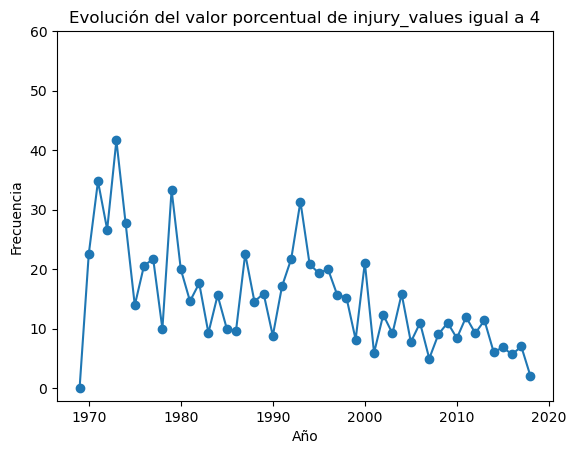

In [109]:
plot_injury_values_evolution_perc(percentages_df, 4)

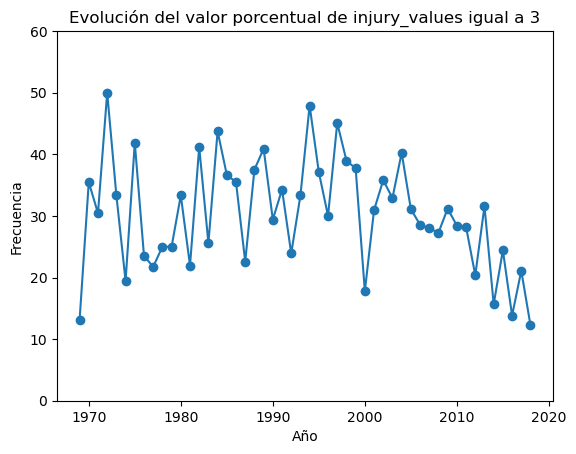

In [110]:
plot_injury_values_evolution_perc(percentages_df, 3)

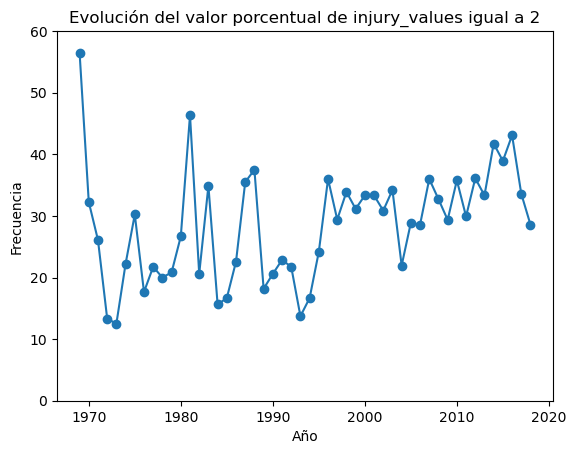

In [111]:
plot_injury_values_evolution_perc(percentages_df, 2)

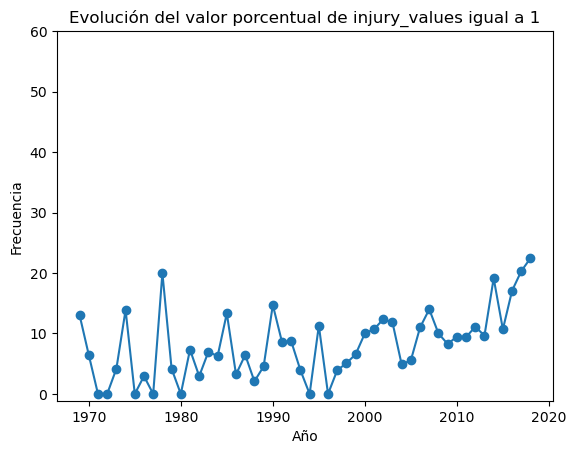

In [112]:
plot_injury_values_evolution_perc(percentages_df, 1)

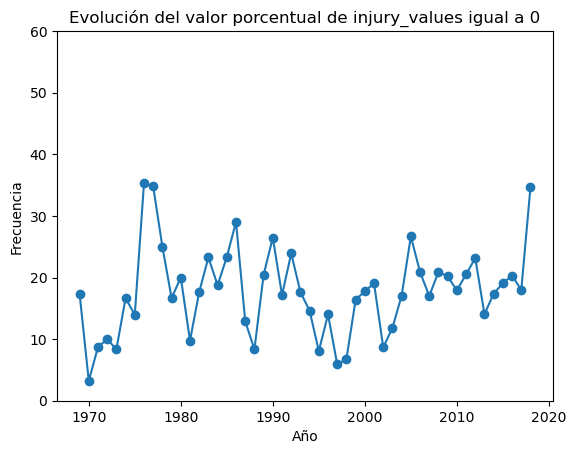

In [113]:
plot_injury_values_evolution_perc(percentages_df, 0)

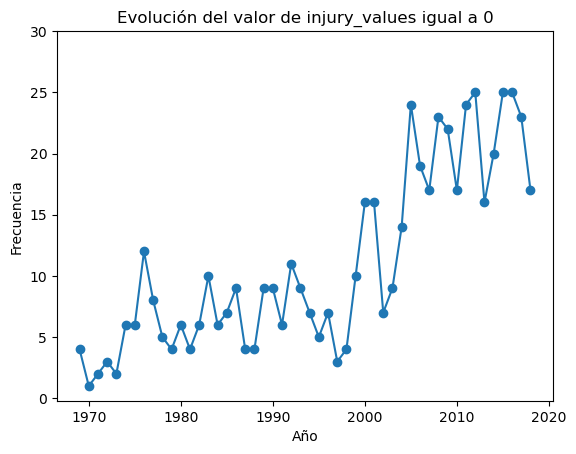

In [114]:
plot_injury_values_evolution_0(new_df, 0)

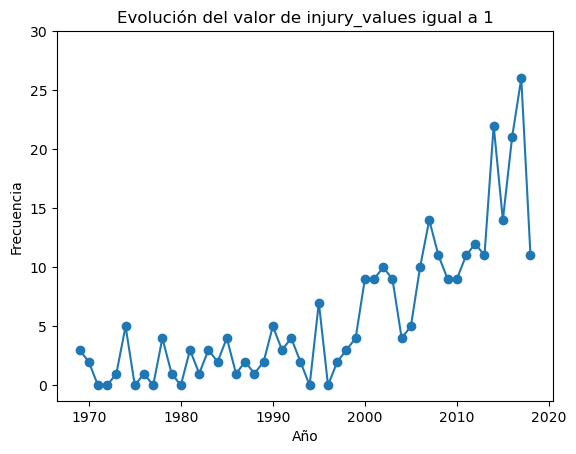

In [99]:
plot_injury_values_evolution_1(new_df, 1)

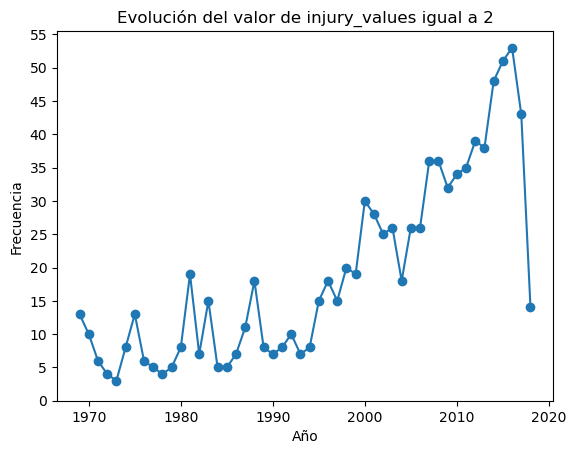

In [100]:
plot_injury_values_evolution_2(new_df, 2)

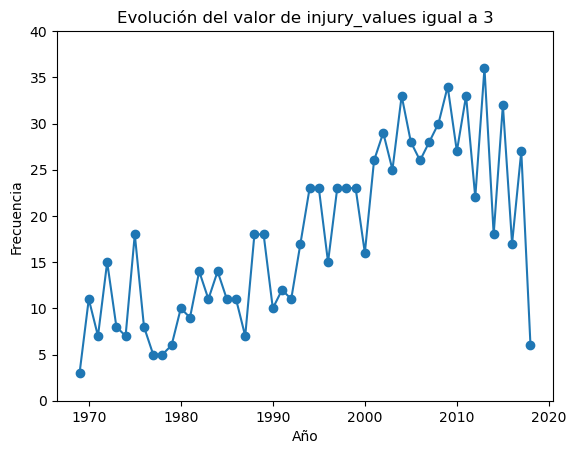

In [101]:
plot_injury_values_evolution_3(new_df, 3)

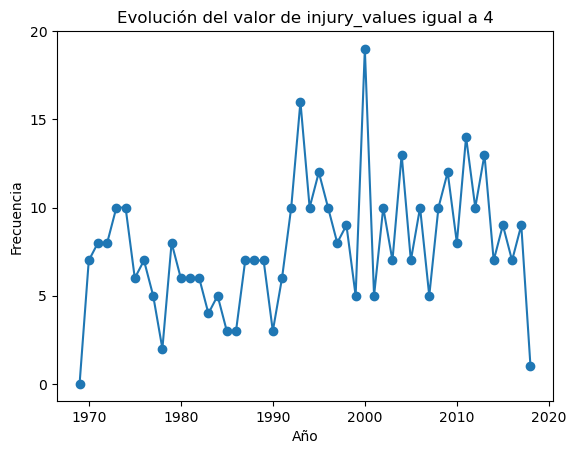

In [102]:
plot_injury_values_evolution_4(new_df, 4)

<Figure size 640x480 with 0 Axes>

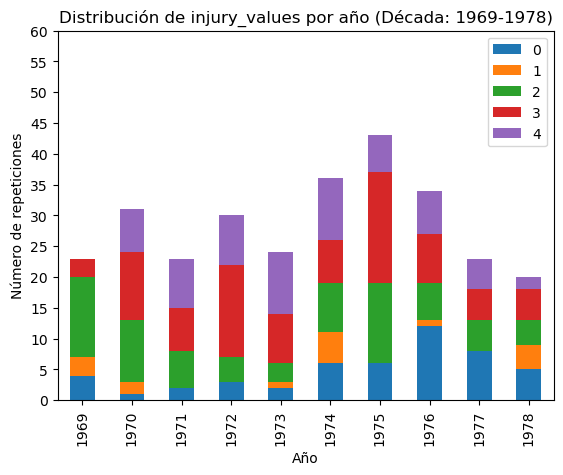

<Figure size 640x480 with 0 Axes>

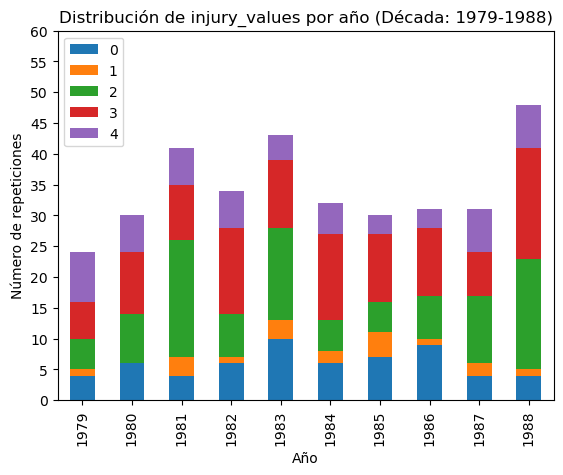

<Figure size 640x480 with 0 Axes>

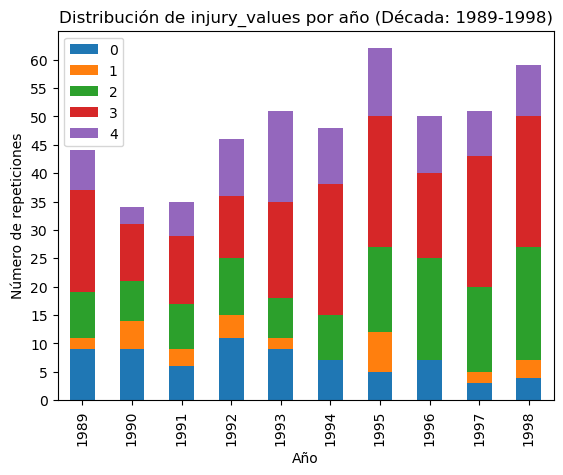

<Figure size 640x480 with 0 Axes>

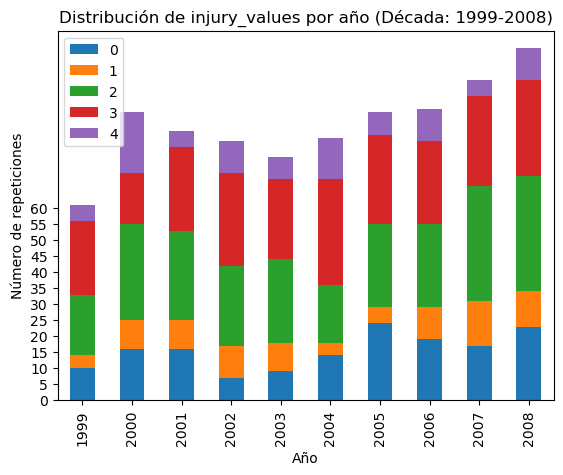

<Figure size 640x480 with 0 Axes>

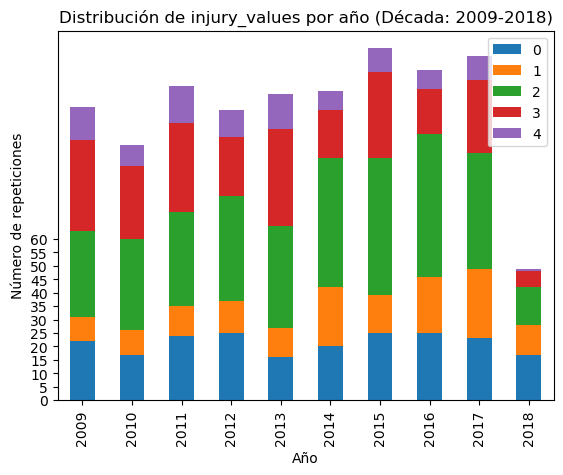

In [103]:
def plot_per_decade(df):
    # Crear los intervalos de 10 años
    bins = range(df.index.min(), df.index.max()+11, 10)  # Añadir -1 para incluir el primer año
    
    # Crear gráficos separados por cada década
    for decade in range(0, len(bins)-1):
        plt.figure()
        subset = df.loc[(df.index >= bins[decade]) & (df.index < bins[decade+1])]

        # Crear un gráfico de barras para cada valor de "injury_values"
        subset.plot(kind='bar', stacked=True)

        # Personalizar el gráfico
        plt.xlabel('Año')
        plt.ylabel('Número de repeticiones')
        plt.title(f'Distribución de injury_values por año (Década: {bins[decade]}-{bins[decade+1]-1})')
        plt.yticks(range(0, 61, 5))           
        plt.legend()

        plt.show()
plot_per_decade(new_df)

<Figure size 640x480 with 0 Axes>

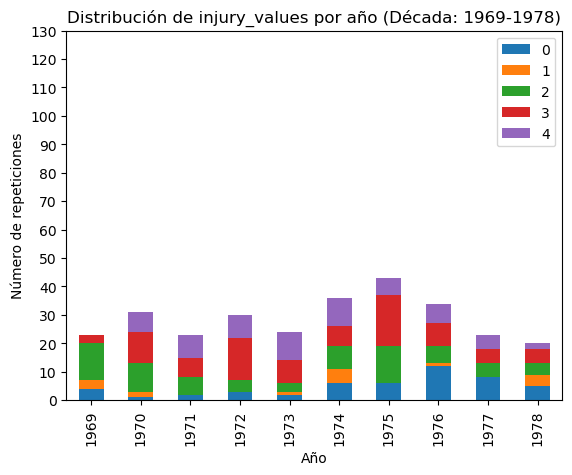

<Figure size 640x480 with 0 Axes>

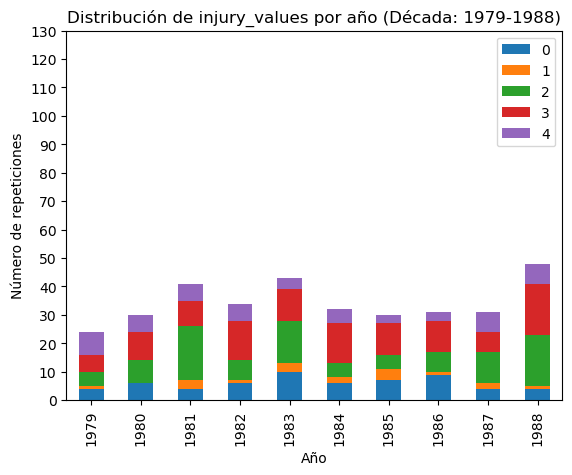

<Figure size 640x480 with 0 Axes>

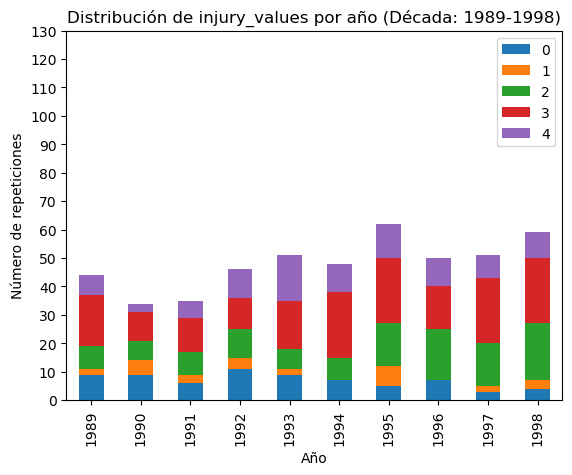

<Figure size 640x480 with 0 Axes>

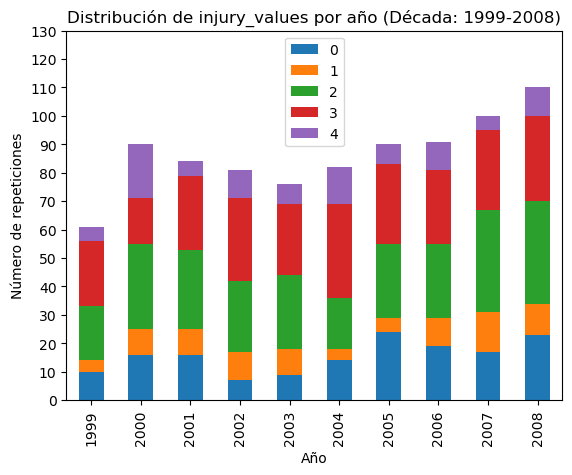

<Figure size 640x480 with 0 Axes>

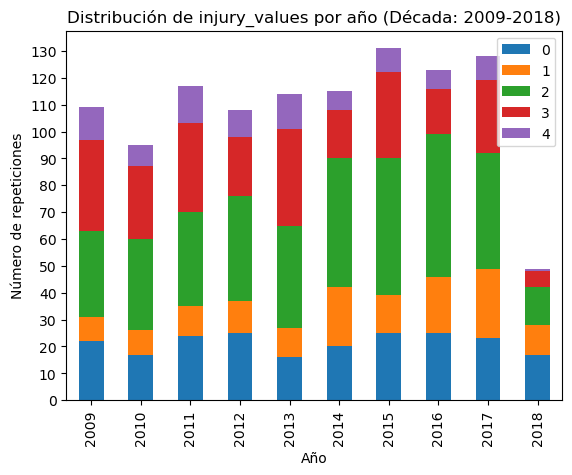

In [104]:
def plot_per_decade_2(df):
    # Crear los intervalos de 10 años
    bins = range(df.index.min(), df.index.max()+11, 10)  # Añadir -1 para incluir el primer año
    
    # Crear gráficos separados por cada década
    for decade in range(0, len(bins)-1):
        plt.figure()
        subset = df.loc[(df.index >= bins[decade]) & (df.index < bins[decade+1])]

        # Crear un gráfico de barras para cada valor de "injury_values"
        subset.plot(kind='bar', stacked=True)

        # Personalizar el gráfico
        plt.xlabel('Año')
        plt.ylabel('Número de repeticiones')
        plt.title(f'Distribución de injury_values por año (Década: {bins[decade]}-{bins[decade+1]-1})')
        plt.yticks(range(0, 135, 10))           
        plt.legend()

        plt.show()
plot_per_decade_2(new_df)

In [105]:
descripcion_lesiones = df.groupby('year')['injury_values'].describe().round(2).T
descripcion_lesiones

year,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,23.00,31.00,23.00,30.00,24.00,36.00,43.00,34.00,23.00,20.00,24.00,30.00,41.00,34.00,43.00,32.00,30.00,31.00,31.00,48.00,44.00,34.00,35.00,46.00,51.00,48.00,62.00,50.00,51.00,59.00,61.00,90.00,84.00,81.00,76.00,82.00,90.00,91.00,100.00,110.00,109.00,95.0,117.00,108.00,114.00,115.00,131.00,123.00,128.00,49.00
mean,1.65,2.68,2.83,2.83,2.96,2.28,2.42,1.91,1.96,1.75,2.54,2.33,2.24,2.38,1.91,2.31,1.97,1.94,2.35,2.48,2.27,1.79,2.26,2.11,2.57,2.60,2.48,2.42,2.61,2.51,2.15,2.14,1.94,2.31,2.16,2.33,1.88,1.98,1.90,1.94,2.05,2.0,2.02,1.81,2.17,1.74,1.89,1.67,1.79,1.24
std,0.93,1.01,1.19,1.15,1.23,1.45,1.18,1.60,1.61,1.37,1.44,1.37,1.11,1.33,1.29,1.35,1.38,1.41,1.28,1.05,1.37,1.37,1.34,1.48,1.43,1.25,1.17,1.23,1.00,1.04,1.19,1.35,1.20,1.11,1.13,1.30,1.32,1.30,1.14,1.26,1.29,1.2,1.30,1.26,1.19,1.11,1.18,1.12,1.17,1.13
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,2.00,3.00,2.75,1.00,2.00,0.00,0.00,0.75,2.00,2.00,2.00,2.00,1.00,1.75,1.00,0.00,2.00,2.00,1.75,0.25,1.50,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,2.00,2.00,2.00,0.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,2.00,1.00,1.00,1.00,1.00,0.00
50%,2.00,3.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,3.00,3.00,2.00,3.00,2.00,3.00,2.00,2.00,2.00,3.00,3.00,2.00,3.00,2.00,3.00,3.00,3.00,2.50,3.00,3.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.0,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00
75%,2.00,3.00,4.00,3.75,4.00,4.00,3.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.0,3.00,3.00,3.00,2.00,3.00,2.00,3.00,2.00
max,3.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.0,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00


In [115]:
df

,year,month,day,date,injury,injury_values,fatal_(y/n),type,activity,country,area,location,name,sex,age,time,case_number,case_number_1,case_number_2,species,investigator_or_source,pdf,href_formula,href,original_order,unnamed:_22,unnamed:_23
1,2018,06,25,25-06-2018,no injury,0,n,Boating,paddling,Usa,California,"Oceanside, San Diego County",Julie Wolfe,Unknown,57,18h00,25-06-2018,25-06-2018,25-06-2018,shark,"r. collier, gsaf",2018.06.25-wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0,NaN,NaN
2,2018,06,18,18-06-2018,minor injury,1,n,Unprovoked,standing,Usa,Georgia,"St. Simon Island, Glynn County",Adyson McNeely,Unknown,11,14h00 -15h00,18-06-2018,18-06-2018,18-06-2018,unknown,"k.mcmurray, trackingsharks.com",2018.06.18-mcneely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0,NaN,NaN
3,2018,06,09,09-06-2018,no injury,0,n,Unknown,surfing,Usa,Hawaii,"Habush, Oahu",John Denges,Unknown,48,07h45,09-06-2018,09-06-2018,09-06-2018,unknown,"k.mcmurray, trackingsharks.com",2018.06.09-denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0,NaN,NaN
4,2018,06,08,08-06-2018,minor injury,1,n,Unprovoked,surfing,Australia,New South Wales,Arrawarra Headland,unknown,M,Unknown,unknown,08-06-2018,08-06-2018,08-06-2018,shark,"b. myatt, gsaf",2018.06.08-arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0,NaN,NaN
5,2018,06,04,04-06-2018,injury,2,n,Provoked,diving,Mexico,Colima,La Ticla,Gustavo Ramos,Unknown,Unknown,unknown,04-06-2018,04-06-2018,04-06-2018,"shark, 3m",a .kipper,2018.06.04-ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061,1969,03,09,09-03-1969,no injury,0,n,Unprovoked,surfing,Usa,Hawaii,"Makaha, O'Ahu",Licius Lee,Unknown,16,17h30,09-03-1969,09-03-1969,09-03-1969,"shark, identified by tooth fragments in surfboard","j. borg, p.73; l. taylor (1993), pp.102-103",1969.03.09-lee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2864.0,NaN,NaN
3062,1969,02,17,reported 17-02-1969,injury,2,n,Provoked,fishing,Australia,Tasmania,Taroona,George Pacey,Unknown,49,daytime,17-02-1969,17-02-1969,17-02-1969,shark,"c. black, gsaf",1969.02.17.r-pacey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2863.0,NaN,NaN
3063,1969,01,27,27-01-1969,injury,2,n,Unprovoked,diving,Australia,New South Wales,Beecroft Head,Kevin Deacon,Unknown,21,07h30,27-01-1969,27-01-1969,27-01-1969,unknown,h.d.baldridge (1994) saf case #1560,1969.01.27-deacon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2861.0,NaN,NaN
3064,1969,01,00,01-1969,minor injury,1,n,Unprovoked,unknown,Australia,Victoria,Port Macdonnel,W.D. Simpson,Unknown,Unknown,unknown,00-01-1969,00-01-1969,00-01-1969,shark,"h.d.baldridge (1994), saf case #1594",1969.01.00-simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2860.0,NaN,NaN


In [117]:
df_clean = df
df_clean

,year,month,day,date,injury,injury_values,fatal_(y/n),type,activity,country,area,location,name,sex,age,time,case_number,case_number_1,case_number_2,species,investigator_or_source,pdf,href_formula,href,original_order,unnamed:_22,unnamed:_23
1,2018,06,25,25-06-2018,no injury,0,n,Boating,paddling,Usa,California,"Oceanside, San Diego County",Julie Wolfe,Unknown,57,18h00,25-06-2018,25-06-2018,25-06-2018,shark,"r. collier, gsaf",2018.06.25-wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0,NaN,NaN
2,2018,06,18,18-06-2018,minor injury,1,n,Unprovoked,standing,Usa,Georgia,"St. Simon Island, Glynn County",Adyson McNeely,Unknown,11,14h00 -15h00,18-06-2018,18-06-2018,18-06-2018,unknown,"k.mcmurray, trackingsharks.com",2018.06.18-mcneely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0,NaN,NaN
3,2018,06,09,09-06-2018,no injury,0,n,Unknown,surfing,Usa,Hawaii,"Habush, Oahu",John Denges,Unknown,48,07h45,09-06-2018,09-06-2018,09-06-2018,unknown,"k.mcmurray, trackingsharks.com",2018.06.09-denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0,NaN,NaN
4,2018,06,08,08-06-2018,minor injury,1,n,Unprovoked,surfing,Australia,New South Wales,Arrawarra Headland,unknown,M,Unknown,unknown,08-06-2018,08-06-2018,08-06-2018,shark,"b. myatt, gsaf",2018.06.08-arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0,NaN,NaN
5,2018,06,04,04-06-2018,injury,2,n,Provoked,diving,Mexico,Colima,La Ticla,Gustavo Ramos,Unknown,Unknown,unknown,04-06-2018,04-06-2018,04-06-2018,"shark, 3m",a .kipper,2018.06.04-ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061,1969,03,09,09-03-1969,no injury,0,n,Unprovoked,surfing,Usa,Hawaii,"Makaha, O'Ahu",Licius Lee,Unknown,16,17h30,09-03-1969,09-03-1969,09-03-1969,"shark, identified by tooth fragments in surfboard","j. borg, p.73; l. taylor (1993), pp.102-103",1969.03.09-lee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2864.0,NaN,NaN
3062,1969,02,17,reported 17-02-1969,injury,2,n,Provoked,fishing,Australia,Tasmania,Taroona,George Pacey,Unknown,49,daytime,17-02-1969,17-02-1969,17-02-1969,shark,"c. black, gsaf",1969.02.17.r-pacey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2863.0,NaN,NaN
3063,1969,01,27,27-01-1969,injury,2,n,Unprovoked,diving,Australia,New South Wales,Beecroft Head,Kevin Deacon,Unknown,21,07h30,27-01-1969,27-01-1969,27-01-1969,unknown,h.d.baldridge (1994) saf case #1560,1969.01.27-deacon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2861.0,NaN,NaN
3064,1969,01,00,01-1969,minor injury,1,n,Unprovoked,unknown,Australia,Victoria,Port Macdonnel,W.D. Simpson,Unknown,Unknown,unknown,00-01-1969,00-01-1969,00-01-1969,shark,"h.d.baldridge (1994), saf case #1594",1969.01.00-simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2860.0,NaN,NaN


In [118]:
df_clean.to_csv('df_clean.csv', index=False)